In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import re
import glob
import pandas as pd
import librosa
import numpy as np
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math

In [ ]:
audio_file_path="/content/drive/MyDrive/FYP 2023/Dataset/female_Hyperfunktionelle_Dysphonie/1037-a_h.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

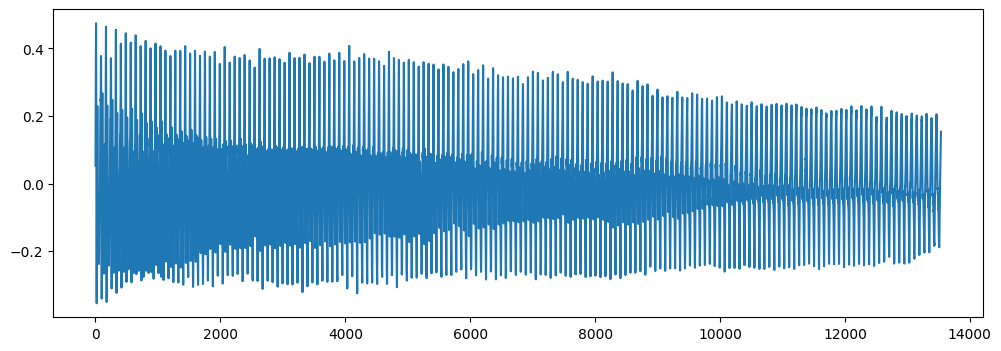

In [ ]:
###plot the librosa audio data
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
def features_extractor_MFCC(file_name):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
disphonie = 0
laryn = 0
heal = 0
def features_extractor_currect_folder(foldername,label):
  global disphonie, laryn, heal
  label_feature=[]
  for filename in tqdm(glob.glob(foldername+'/*.wav')):
    if label == 0:
      heal += 1
    elif label == 1:
      disphonie +=1
    elif label == 2:
      laryn += 1
    data=features_extractor_MFCC(filename)
    label_feature.append([data,label])
    # print((label_feature))
  return label_feature

In [ ]:
hyper_disphonie = []
laryngitis = []
healthy = []
label_features = []
folder_path='/content/drive/MyDrive/FYP 2023/Dataset'
folders_labels = [
    (
        flder,
        0 if 'healthy' in flder[len(folder_path):] else
        1 if 'Dysphonie' in flder[len(folder_path):] else
        2 if 'laryngitis' in flder[len(folder_path):] else -1  # Default label if none match
    )
    for flder in glob.glob(folder_path + '/*')
]
print(folders_labels)


import numpy as np
from scipy.stats import skew

def mfcc_skewness(foldername, label):
    mfccs_skewness = []
    for filename in tqdm(glob.glob(foldername + '/*.wav')):
        audio, sample_rate = librosa.load(filename)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # mfccs_features = transformation(mfccs_features)
        print(mfccs_features.shape)
        mfccs_skewness.append(skew(mfccs_features, axis=None))
    return np.mean(mfccs_skewness)

skewness_dict = {}


for folder , label in (folders_labels):
  skewness = mfcc_skewness(folder, label)
  skewness_dict[label] = skewness

  label_features.extend(features_extractor_currect_folder(folder,label))
  # print(label_features)
  # break

[('/content/drive/MyDrive/FYP 2023/Dataset/female_Hyperfunktionelle_Dysphonie', 1), ('/content/drive/MyDrive/FYP 2023/Dataset/female_laryngitis', 2), ('/content/drive/MyDrive/FYP 2023/Dataset/male_Hyperfunktionelle_Dysphonie', 1), ('/content/drive/MyDrive/FYP 2023/Dataset/male_laryngitis', 2), ('/content/drive/MyDrive/FYP 2023/Dataset/female_healthy', 0), ('/content/drive/MyDrive/FYP 2023/Dataset/male_healthy', 0)]


  1%|          | 5/533 [00:00<00:11, 45.28it/s]

(40, 66)
(40, 49)
(40, 33)
(40, 23)
(40, 43)
(40, 86)


  2%|▏         | 10/533 [00:03<03:12,  2.72it/s]

(40, 86)
(40, 32)
(40, 1332)
(40, 25)
(40, 54)


  3%|▎         | 16/533 [00:03<01:39,  5.19it/s]

(40, 70)
(40, 86)
(40, 86)
(40, 58)
(40, 56)
(40, 50)
(40, 86)
(40, 25)


  5%|▍         | 24/533 [00:03<00:57,  8.82it/s]

(40, 2029)
(40, 86)
(40, 30)
(40, 54)
(40, 1239)
(40, 45)


  7%|▋         | 35/533 [00:03<00:28, 17.71it/s]

(40, 62)
(40, 51)
(40, 54)
(40, 61)
(40, 52)
(40, 48)
(40, 56)
(40, 56)
(40, 63)
(40, 51)
(40, 37)


  9%|▉         | 47/533 [00:04<00:16, 28.86it/s]

(40, 28)
(40, 44)
(40, 58)
(40, 40)
(40, 41)
(40, 47)
(40, 53)
(40, 48)
(40, 41)
(40, 41)
(40, 70)
(40, 31)


 10%|▉         | 52/533 [00:04<00:18, 26.58it/s]

(40, 1588)
(40, 53)
(40, 38)
(40, 39)
(40, 53)


 11%|█         | 57/533 [00:04<00:22, 21.09it/s]

(40, 1670)
(40, 74)
(40, 47)
(40, 72)


 11%|█▏        | 61/533 [00:04<00:20, 22.89it/s]

(40, 82)
(40, 36)
(40, 72)
(40, 85)
(40, 56)
(40, 84)
(40, 1657)


 13%|█▎        | 68/533 [00:05<00:27, 16.88it/s]

(40, 1563)
(40, 70)
(40, 86)
(40, 59)
(40, 50)
(40, 62)


 14%|█▍        | 74/533 [00:05<00:23, 19.47it/s]

(40, 88)
(40, 32)
(40, 86)
(40, 57)
(40, 85)


 15%|█▌        | 81/533 [00:05<00:18, 24.16it/s]

(40, 50)
(40, 61)
(40, 75)
(40, 39)
(40, 27)
(40, 32)
(40, 83)


 17%|█▋        | 88/533 [00:06<00:16, 26.94it/s]

(40, 50)
(40, 55)
(40, 56)
(40, 57)
(40, 58)
(40, 51)
(40, 62)


 18%|█▊        | 94/533 [00:06<00:16, 27.22it/s]

(40, 80)
(40, 30)
(40, 55)
(40, 63)
(40, 25)
(40, 41)


 18%|█▊        | 97/533 [00:06<00:15, 27.50it/s]

(40, 50)
(40, 73)


 20%|█▉        | 104/533 [00:06<00:19, 22.55it/s]

(40, 1293)
(40, 35)
(40, 86)
(40, 76)
(40, 50)
(40, 40)
(40, 43)


 20%|██        | 108/533 [00:06<00:16, 25.18it/s]

(40, 45)
(40, 26)
(40, 39)
(40, 85)
(40, 32)
(40, 80)
(40, 49)


 21%|██        | 112/533 [00:07<00:15, 26.85it/s]

(40, 47)
(40, 1348)


 22%|██▏       | 118/533 [00:07<00:18, 21.93it/s]

(40, 25)
(40, 28)
(40, 69)
(40, 68)
(40, 72)
(40, 72)


 23%|██▎       | 121/533 [00:07<00:17, 23.25it/s]

(40, 63)
(40, 86)
(40, 59)
(40, 1519)


 24%|██▎       | 126/533 [00:08<00:27, 15.02it/s]

(40, 1794)
(40, 63)
(40, 66)
(40, 60)
(40, 61)


 24%|██▍       | 129/533 [00:08<00:23, 16.98it/s]

(40, 47)
(40, 82)
(40, 1270)


 25%|██▌       | 135/533 [00:08<00:21, 18.46it/s]

(40, 55)
(40, 55)
(40, 48)
(40, 49)
(40, 63)
(40, 64)


 26%|██▋       | 141/533 [00:08<00:17, 22.17it/s]

(40, 47)
(40, 79)
(40, 52)
(40, 52)
(40, 42)
(40, 41)


 28%|██▊       | 147/533 [00:08<00:15, 25.10it/s]

(40, 61)
(40, 74)
(40, 62)
(40, 83)
(40, 65)
(40, 76)


 29%|██▉       | 154/533 [00:09<00:15, 25.16it/s]

(40, 1265)
(40, 60)
(40, 61)
(40, 33)
(40, 30)
(40, 37)
(40, 75)
(40, 73)


 30%|██▉       | 158/533 [00:09<00:13, 28.25it/s]

(40, 55)
(40, 1380)


 31%|███       | 166/533 [00:09<00:15, 23.69it/s]

(40, 84)
(40, 34)
(40, 85)
(40, 63)
(40, 63)
(40, 27)
(40, 52)


 32%|███▏      | 170/533 [00:09<00:14, 25.56it/s]

(40, 70)
(40, 58)
(40, 54)
(40, 57)
(40, 83)
(40, 49)
(40, 31)
(40, 60)
(40, 50)

 34%|███▎      | 179/533 [00:10<00:11, 32.17it/s]


(40, 62)
(40, 65)
(40, 50)
(40, 63)
(40, 48)
(40, 63)
(40, 30)


 35%|███▌      | 187/533 [00:10<00:10, 32.47it/s]

(40, 84)
(40, 50)
(40, 49)
(40, 38)
(40, 44)
(40, 85)
(40, 51)


 36%|███▌      | 191/533 [00:10<00:10, 31.49it/s]

(40, 48)
(40, 33)
(40, 81)
(40, 66)
(40, 85)


 37%|███▋      | 195/533 [00:10<00:12, 27.12it/s]

(40, 49)
(40, 73)
(40, 61)


 37%|███▋      | 198/533 [00:10<00:17, 19.62it/s]

(40, 1511)
(40, 1688)


 38%|███▊      | 205/533 [00:11<00:16, 19.40it/s]

(40, 61)
(40, 69)
(40, 62)
(40, 75)
(40, 68)
(40, 85)


 40%|███▉      | 212/533 [00:11<00:13, 24.24it/s]

(40, 81)
(40, 53)
(40, 42)
(40, 36)
(40, 77)
(40, 79)
(40, 57)
(40, 86)
(40, 67)


 40%|████      | 215/533 [00:11<00:18, 17.23it/s]

(40, 2288)


 41%|████▏     | 221/533 [00:12<00:18, 16.82it/s]

(40, 2028)
(40, 97)
(40, 42)
(40, 82)
(40, 71)
(40, 82)


 43%|████▎     | 229/533 [00:12<00:12, 24.20it/s]

(40, 79)
(40, 81)
(40, 91)
(40, 56)
(40, 48)
(40, 59)
(40, 78)
(40, 47)


 44%|████▎     | 233/533 [00:12<00:11, 27.20it/s]

(40, 100)
(40, 50)
(40, 78)
(40, 84)
(40, 43)
(40, 1922)
(40, 57)


 45%|████▌     | 242/533 [00:13<00:14, 19.65it/s]

(40, 1616)
(40, 53)
(40, 59)
(40, 84)
(40, 66)
(40, 77)
(40, 40)
(40, 72)
(40, 101)
(40, 66)


 47%|████▋     | 253/533 [00:13<00:09, 30.17it/s]

(40, 76)
(40, 84)
(40, 65)
(40, 84)
(40, 41)
(40, 81)
(40, 86)
(40, 28)
(40, 60)
(40, 80)
(40, 71)

 50%|████▉     | 264/533 [00:13<00:06, 39.29it/s]


(40, 33)
(40, 35)
(40, 26)
(40, 82)
(40, 47)
(40, 50)
(40, 53)
(40, 83)
(40, 41)


 50%|█████     | 269/533 [00:13<00:08, 29.83it/s]

(40, 31)
(40, 43)
(40, 1946)
(40, 31)


 53%|█████▎    | 281/533 [00:14<00:06, 39.22it/s]

(40, 82)
(40, 37)
(40, 26)
(40, 65)
(40, 49)
(40, 61)
(40, 67)
(40, 32)
(40, 66)
(40, 65)
(40, 55)


 54%|█████▎    | 286/533 [00:14<00:09, 26.72it/s]

(40, 1633)
(40, 56)
(40, 76)
(40, 1738)
(40, 58)


 55%|█████▍    | 292/533 [00:14<00:07, 31.69it/s]

(40, 46)
(40, 66)
(40, 48)
(40, 49)
(40, 47)
(40, 48)
(40, 72)
(40, 58)
(40, 53)
(40, 84)
(40, 76)


 56%|█████▌    | 298/533 [00:14<00:06, 35.45it/s]

(40, 64)
(40, 41)
(40, 53)
(40, 77)
(40, 42)


 58%|█████▊    | 309/533 [00:15<00:06, 36.18it/s]

(40, 1504)
(40, 47)
(40, 46)
(40, 41)
(40, 46)
(40, 61)
(40, 45)
(40, 76)
(40, 50)
(40, 83)
(40, 83)


 60%|█████▉    | 319/533 [00:15<00:06, 33.63it/s]

(40, 53)
(40, 42)
(40, 47)
(40, 1582)
(40, 43)
(40, 65)


 62%|██████▏   | 329/533 [00:15<00:05, 40.04it/s]

(40, 62)
(40, 52)
(40, 49)
(40, 58)
(40, 60)
(40, 29)
(40, 63)
(40, 65)
(40, 79)
(40, 37)
(40, 29)


 63%|██████▎   | 335/533 [00:15<00:04, 43.68it/s]

(40, 51)
(40, 57)
(40, 55)
(40, 57)
(40, 74)
(40, 57)
(40, 64)


 64%|██████▍   | 340/533 [00:16<00:06, 28.69it/s]

(40, 1177)
(40, 1430)
(40, 46)
(40, 69)
(40, 34)
(40, 73)


 66%|██████▌   | 350/533 [00:16<00:05, 35.61it/s]

(40, 64)
(40, 72)
(40, 34)
(40, 65)
(40, 58)
(40, 69)
(40, 82)
(40, 38)
(40, 55)
(40, 44)
(40, 27)


 67%|██████▋   | 359/533 [00:16<00:06, 28.18it/s]

(40, 1449)
(40, 52)
(40, 30)
(40, 1704)
(40, 29)


 68%|██████▊   | 365/533 [00:16<00:05, 33.42it/s]

(40, 85)
(40, 41)
(40, 84)
(40, 56)
(40, 41)
(40, 85)
(40, 52)
(40, 33)
(40, 42)
(40, 74)
(40, 77)
(40, 35)


 71%|███████▏  | 381/533 [00:17<00:03, 41.19it/s]

(40, 38)
(40, 31)
(40, 36)
(40, 35)
(40, 55)
(40, 40)
(40, 64)
(40, 85)
(40, 90)
(40, 71)


 72%|███████▏  | 386/533 [00:17<00:04, 33.16it/s]

(40, 61)
(40, 24)
(40, 25)
(40, 43)
(40, 1769)


 73%|███████▎  | 391/533 [00:17<00:03, 36.28it/s]

(40, 27)
(40, 48)
(40, 33)
(40, 81)
(40, 25)
(40, 24)


 75%|███████▌  | 402/533 [00:17<00:03, 36.39it/s]

(40, 1621)
(40, 85)
(40, 25)
(40, 79)
(40, 25)
(40, 62)
(40, 24)
(40, 75)
(40, 61)
(40, 84)
(40, 70)
(40, 83)
(40, 72)


 77%|███████▋  | 412/533 [00:18<00:03, 31.01it/s]

(40, 2152)
(40, 86)
(40, 61)
(40, 79)
(40, 53)
(40, 86)
(40, 84)
(40, 54)
(40, 85)


 78%|███████▊  | 417/533 [00:18<00:03, 34.71it/s]

(40, 86)
(40, 77)
(40, 60)


 80%|████████  | 428/533 [00:18<00:03, 33.43it/s]

(40, 2142)
(40, 61)
(40, 61)
(40, 94)
(40, 73)
(40, 86)
(40, 80)
(40, 82)
(40, 51)
(40, 85)
(40, 73)


 81%|████████  | 432/533 [00:18<00:03, 29.56it/s]

(40, 77)
(40, 47)
(40, 1500)
(40, 47)
(40, 44)
(40, 54)


 82%|████████▏ | 438/533 [00:18<00:02, 34.99it/s]

(40, 46)
(40, 57)
(40, 42)
(40, 46)
(40, 52)
(40, 45)
(40, 30)
(40, 27)


 84%|████████▍ | 447/533 [00:19<00:02, 29.60it/s]

(40, 43)
(40, 87)
(40, 52)
(40, 81)
(40, 63)


 85%|████████▍ | 451/533 [00:19<00:02, 28.66it/s]

(40, 44)
(40, 38)
(40, 85)
(40, 40)
(40, 52)
(40, 88)


 85%|████████▌ | 455/533 [00:19<00:02, 26.66it/s]

(40, 47)
(40, 45)
(40, 62)


 86%|████████▋ | 461/533 [00:20<00:03, 20.47it/s]

(40, 1752)
(40, 59)
(40, 81)
(40, 46)
(40, 64)
(40, 69)
(40, 1535)


 88%|████████▊ | 467/533 [00:20<00:03, 18.77it/s]

(40, 51)
(40, 49)
(40, 93)
(40, 46)
(40, 43)
(40, 67)
(40, 68)

 89%|████████▉ | 474/533 [00:20<00:02, 24.09it/s]


(40, 42)
(40, 36)
(40, 36)
(40, 37)
(40, 43)
(40, 72)


 91%|█████████ | 483/533 [00:21<00:02, 23.83it/s]

(40, 2246)
(40, 77)
(40, 53)
(40, 29)
(40, 27)
(40, 79)
(40, 61)
(40, 73)
(40, 80)


 91%|█████████▏| 487/533 [00:21<00:01, 26.14it/s]

(40, 80)
(40, 84)


 92%|█████████▏| 491/533 [00:21<00:02, 20.41it/s]

(40, 1523)
(40, 77)
(40, 62)
(40, 66)
(40, 78)
(40, 81)


 93%|█████████▎| 497/533 [00:21<00:01, 22.23it/s]

(40, 55)
(40, 76)
(40, 74)
(40, 41)
(40, 64)


 94%|█████████▍| 500/533 [00:22<00:01, 17.66it/s]

(40, 85)
(40, 1451)
(40, 68)

 95%|█████████▍| 505/533 [00:22<00:01, 22.99it/s]


(40, 54)
(40, 57)
(40, 74)
(40, 54)
(40, 69)


 96%|█████████▌| 511/533 [00:22<00:01, 19.50it/s]

(40, 1423)
(40, 37)
(40, 68)
(40, 40)
(40, 47)


 96%|█████████▋| 514/533 [00:22<00:00, 19.72it/s]

(40, 69)
(40, 52)
(40, 57)
(40, 42)


 97%|█████████▋| 517/533 [00:22<00:01, 15.80it/s]

(40, 1201)
(40, 47)
(40, 32)
(40, 31)
(40, 73)


 98%|█████████▊| 524/533 [00:23<00:00, 20.34it/s]

(40, 37)
(40, 55)
(40, 64)
(40, 53)
(40, 41)
(40, 51)


 99%|█████████▉| 530/533 [00:23<00:00, 23.74it/s]

(40, 38)
(40, 59)
(40, 49)
(40, 40)
(40, 33)
(40, 30)


100%|██████████| 533/533 [00:23<00:00, 22.63it/s]


(40, 27)


  1%|          | 3/299 [00:00<00:11, 24.69it/s]

(40, 49)
(40, 55)
(40, 73)


  3%|▎         | 9/299 [00:01<00:35,  8.18it/s]

(40, 52)
(40, 52)
(40, 53)
(40, 48)
(40, 59)
(40, 1081)
(40, 84)


  4%|▍         | 12/299 [00:01<00:28, 10.00it/s]

(40, 35)
(40, 1647)
(40, 58)
(40, 52)


  8%|▊         | 24/299 [00:01<00:10, 25.31it/s]

(40, 70)
(40, 86)
(40, 41)
(40, 44)
(40, 28)
(40, 47)
(40, 47)
(40, 68)
(40, 39)
(40, 40)
(40, 41)
(40, 57)


 12%|█▏        | 35/299 [00:01<00:09, 29.32it/s]

(40, 2083)
(40, 42)
(40, 41)
(40, 64)
(40, 23)
(40, 53)
(40, 38)
(40, 52)
(40, 50)
(40, 40)


 15%|█▌        | 46/299 [00:02<00:06, 37.43it/s]

(40, 35)
(40, 65)
(40, 36)
(40, 39)
(40, 59)
(40, 79)
(40, 31)
(40, 40)
(40, 33)
(40, 22)
(40, 34)


 17%|█▋        | 52/299 [00:02<00:06, 40.42it/s]

(40, 32)
(40, 29)
(40, 67)
(40, 72)
(40, 79)
(40, 27)


 19%|█▉        | 57/299 [00:02<00:08, 28.34it/s]

(40, 1362)
(40, 1565)
(40, 35)
(40, 35)
(40, 36)
(40, 76)


 23%|██▎       | 69/299 [00:02<00:05, 38.44it/s]

(40, 37)
(40, 80)
(40, 48)
(40, 85)
(40, 62)
(40, 35)
(40, 46)
(40, 28)
(40, 39)
(40, 39)
(40, 41)


 25%|██▍       | 74/299 [00:02<00:06, 34.02it/s]

(40, 1529)
(40, 41)
(40, 39)
(40, 43)
(40, 68)
(40, 25)


 29%|██▉       | 86/299 [00:03<00:05, 37.72it/s]

(40, 1614)
(40, 47)
(40, 29)
(40, 27)
(40, 48)
(40, 34)
(40, 43)
(40, 36)
(40, 28)
(40, 58)
(40, 33)
(40, 34)
(40, 39)


 31%|███       | 92/299 [00:03<00:05, 40.77it/s]

(40, 29)
(40, 36)
(40, 66)
(40, 36)


 32%|███▏      | 97/299 [00:03<00:07, 27.87it/s]

(40, 1497)
(40, 33)
(40, 29)
(40, 1800)
(40, 32)


 36%|███▌      | 107/299 [00:03<00:05, 34.09it/s]

(40, 54)
(40, 52)
(40, 85)
(40, 50)
(40, 56)
(40, 80)
(40, 43)
(40, 71)
(40, 68)


 40%|███▉      | 119/299 [00:04<00:04, 43.86it/s]

(40, 67)
(40, 32)
(40, 55)
(40, 34)
(40, 28)
(40, 44)
(40, 30)
(40, 76)
(40, 31)
(40, 35)
(40, 39)
(40, 34)


 41%|████▏     | 124/299 [00:04<00:04, 37.83it/s]

(40, 27)
(40, 59)
(40, 1199)
(40, 30)
(40, 22)
(40, 42)


 43%|████▎     | 129/299 [00:04<00:04, 38.61it/s]

(40, 53)
(40, 46)
(40, 22)
(40, 83)
(40, 949)
(40, 46)
(40, 42)
(40, 44)


 47%|████▋     | 141/299 [00:04<00:03, 42.07it/s]

(40, 27)
(40, 24)
(40, 62)
(40, 30)
(40, 22)
(40, 40)
(40, 58)
(40, 55)
(40, 55)
(40, 51)
(40, 53)
(40, 47)


 49%|████▉     | 147/299 [00:04<00:03, 45.12it/s]

(40, 34)
(40, 50)
(40, 65)
(40, 53)
(40, 48)
(40, 56)
(40, 29)


 53%|█████▎    | 158/299 [00:05<00:04, 35.03it/s]

(40, 1234)
(40, 55)
(40, 65)
(40, 60)
(40, 57)
(40, 1228)


 54%|█████▍    | 162/299 [00:05<00:04, 32.23it/s]

(40, 62)
(40, 54)
(40, 52)
(40, 1078)
(40, 54)


 57%|█████▋    | 171/299 [00:05<00:03, 35.41it/s]

(40, 49)
(40, 42)
(40, 55)
(40, 39)
(40, 73)
(40, 37)
(40, 25)
(40, 42)
(40, 59)
(40, 43)


 61%|██████    | 182/299 [00:05<00:02, 43.65it/s]

(40, 69)
(40, 48)
(40, 27)
(40, 32)
(40, 25)
(40, 46)
(40, 45)
(40, 40)
(40, 46)


 65%|██████▍   | 193/299 [00:06<00:02, 42.24it/s]

(40, 1282)
(40, 24)
(40, 41)
(40, 25)
(40, 38)
(40, 35)
(40, 45)
(40, 25)
(40, 24)
(40, 41)
(40, 22)
(40, 22)


 69%|██████▊   | 205/299 [00:06<00:01, 48.46it/s]

(40, 29)
(40, 60)
(40, 41)
(40, 28)
(40, 85)
(40, 28)
(40, 24)
(40, 28)
(40, 57)
(40, 81)
(40, 60)


 71%|███████   | 211/299 [00:06<00:01, 47.60it/s]

(40, 85)
(40, 81)
(40, 76)
(40, 38)
(40, 29)
(40, 57)
(40, 34)
(40, 68)
(40, 85)


 72%|███████▏  | 216/299 [00:06<00:02, 39.25it/s]

(40, 960)
(40, 86)
(40, 2167)


 74%|███████▍  | 221/299 [00:06<00:02, 31.56it/s]

(40, 28)
(40, 57)
(40, 43)
(40, 41)
(40, 1077)
(40, 23)
(40, 26)


 77%|███████▋  | 229/299 [00:07<00:02, 29.69it/s]

(40, 43)
(40, 23)
(40, 37)
(40, 47)
(40, 881)
(40, 26)
(40, 26)
(40, 24)
(40, 30)


 80%|████████  | 240/299 [00:07<00:01, 38.64it/s]

(40, 25)
(40, 23)
(40, 23)
(40, 31)
(40, 23)
(40, 25)
(40, 23)
(40, 18)
(40, 52)


 84%|████████▍ | 252/299 [00:07<00:01, 42.17it/s]

(40, 1009)
(40, 26)
(40, 65)
(40, 49)
(40, 41)
(40, 22)
(40, 42)
(40, 42)
(40, 44)
(40, 18)
(40, 51)
(40, 41)
(40, 48)

 88%|████████▊ | 264/299 [00:07<00:00, 48.08it/s]


(40, 22)
(40, 22)
(40, 15)
(40, 45)
(40, 47)
(40, 57)
(40, 49)
(40, 54)
(40, 43)
(40, 62)


 93%|█████████▎| 277/299 [00:08<00:00, 45.92it/s]

(40, 1083)
(40, 58)
(40, 41)
(40, 50)
(40, 66)
(40, 53)
(40, 54)
(40, 49)
(40, 36)
(40, 33)
(40, 39)
(40, 49)
(40, 41)
(40, 46)
(40, 25)
(40, 1905)
(40, 62)


 96%|█████████▌| 287/299 [00:08<00:00, 32.31it/s]

(40, 45)
(40, 48)
(40, 52)
(40, 24)
(40, 1161)


 97%|█████████▋| 291/299 [00:08<00:00, 31.56it/s]

(40, 30)
(40, 32)
(40, 31)
(40, 39)
(40, 37)
(40, 34)


100%|██████████| 299/299 [00:09<00:00, 29.17it/s]

(40, 53)
(40, 23)
(40, 39)
(40, 27)
(40, 26)
(40, 34)


  0%|          | 1/533 [00:00<01:06,  8.01it/s]

(40, 1456)
(40, 35)
(40, 31)
(40, 40)
(40, 79)


  1%|          | 6/533 [00:00<00:29, 18.03it/s]

(40, 58)


  2%|▏         | 8/533 [00:02<03:20,  2.62it/s]

(40, 46)
(40, 62)
(40, 81)
(40, 50)
(40, 107)


  3%|▎         | 14/533 [00:02<01:37,  5.33it/s]

(40, 2242)
(40, 45)
(40, 1718)
(40, 83)


  5%|▍         | 25/533 [00:03<00:35, 14.49it/s]

(40, 44)
(40, 44)
(40, 82)
(40, 40)
(40, 57)
(40, 55)
(40, 27)
(40, 28)
(40, 56)
(40, 24)


  7%|▋         | 36/533 [00:03<00:19, 25.33it/s]

(40, 86)
(40, 44)
(40, 84)
(40, 58)
(40, 55)
(40, 80)
(40, 64)
(40, 70)
(40, 60)
(40, 85)
(40, 57)


  8%|▊         | 42/533 [00:03<00:15, 30.89it/s]

(40, 59)
(40, 28)
(40, 50)
(40, 63)
(40, 47)
(40, 63)
(40, 53)


 10%|▉         | 53/533 [00:03<00:14, 33.58it/s]

(40, 1679)
(40, 70)
(40, 73)
(40, 39)
(40, 68)
(40, 53)
(40, 34)
(40, 56)
(40, 63)
(40, 53)
(40, 44)
(40, 57)


 11%|█         | 59/533 [00:03<00:12, 38.25it/s]

(40, 74)
(40, 71)
(40, 71)
(40, 56)
(40, 48)


 13%|█▎        | 70/533 [00:04<00:13, 35.11it/s]

(40, 1978)
(40, 85)
(40, 45)
(40, 50)
(40, 70)
(40, 42)
(40, 54)
(40, 77)
(40, 74)
(40, 82)
(40, 82)
(40, 69)
(40, 64)
(40, 1801)


 15%|█▌        | 81/533 [00:04<00:13, 34.57it/s]

(40, 54)
(40, 63)
(40, 80)
(40, 38)
(40, 42)
(40, 56)
(40, 84)
(40, 102)
(40, 86)
(40, 76)


 16%|█▌        | 86/533 [00:04<00:12, 35.17it/s]

(40, 69)
(40, 82)
(40, 80)
(40, 52)
(40, 55)
(40, 80)


 18%|█▊        | 96/533 [00:05<00:13, 33.09it/s]

(40, 1516)
(40, 58)
(40, 42)
(40, 64)
(40, 43)
(40, 51)
(40, 78)


 19%|█▉        | 100/533 [00:05<00:14, 29.61it/s]

(40, 72)
(40, 78)
(40, 43)
(40, 43)
(40, 85)
(40, 39)


 20%|█▉        | 104/533 [00:05<00:20, 20.85it/s]

(40, 2094)
(40, 1438)


 21%|██        | 110/533 [00:05<00:21, 19.43it/s]

(40, 37)
(40, 62)
(40, 60)
(40, 76)
(40, 54)
(40, 68)


 22%|██▏       | 117/533 [00:06<00:17, 23.32it/s]

(40, 64)
(40, 62)
(40, 32)
(40, 58)
(40, 82)
(40, 40)


 23%|██▎       | 120/533 [00:06<00:17, 23.25it/s]

(40, 53)
(40, 85)
(40, 62)
(40, 44)
(40, 47)


 24%|██▎       | 126/533 [00:06<00:21, 19.28it/s]

(40, 1577)
(40, 85)
(40, 52)
(40, 45)
(40, 64)


 25%|██▍       | 132/533 [00:06<00:19, 20.68it/s]

(40, 69)
(40, 75)
(40, 81)
(40, 47)
(40, 85)


 26%|██▌       | 138/533 [00:07<00:16, 23.40it/s]

(40, 62)
(40, 43)
(40, 52)
(40, 70)
(40, 84)
(40, 82)


 26%|██▋       | 141/533 [00:07<00:15, 24.57it/s]

(40, 48)
(40, 70)
(40, 44)


 27%|██▋       | 144/533 [00:07<00:22, 16.92it/s]

(40, 1357)
(40, 72)
(40, 89)
(40, 66)
(40, 46)


 28%|██▊       | 151/533 [00:07<00:18, 20.99it/s]

(40, 79)
(40, 75)
(40, 79)
(40, 56)
(40, 46)


 29%|██▉       | 154/533 [00:07<00:18, 20.93it/s]

(40, 39)
(40, 50)
(40, 71)
(40, 59)


 29%|██▉       | 157/533 [00:08<00:22, 17.04it/s]

(40, 1560)
(40, 70)
(40, 34)
(40, 73)


 31%|███       | 164/533 [00:08<00:20, 18.03it/s]

(40, 1291)
(40, 58)
(40, 61)
(40, 62)
(40, 65)
(40, 44)


 32%|███▏      | 171/533 [00:08<00:16, 22.46it/s]

(40, 49)
(40, 62)
(40, 34)
(40, 51)
(40, 76)
(40, 56)
(40, 66)


 33%|███▎      | 174/533 [00:09<00:19, 18.35it/s]

(40, 50)
(40, 1372)


 34%|███▍      | 181/533 [00:09<00:15, 22.93it/s]

(40, 79)
(40, 32)
(40, 79)
(40, 73)
(40, 69)
(40, 82)
(40, 80)


 35%|███▌      | 188/533 [00:09<00:12, 26.97it/s]

(40, 59)
(40, 111)
(40, 42)
(40, 52)
(40, 77)
(40, 57)
(40, 68)


 36%|███▌      | 191/533 [00:09<00:14, 23.68it/s]

(40, 1369)
(40, 53)
(40, 40)
(40, 1681)
(40, 53)


 38%|███▊      | 200/533 [00:10<00:11, 28.56it/s]

(40, 86)
(40, 43)
(40, 37)
(40, 87)
(40, 43)
(40, 38)
(40, 70)
(40, 49)
(40, 72)
(40, 51)
(40, 44)


 40%|███▉      | 211/533 [00:10<00:08, 39.38it/s]

(40, 84)
(40, 50)
(40, 66)
(40, 71)
(40, 39)
(40, 24)
(40, 43)
(40, 25)


 41%|████▏     | 221/533 [00:10<00:08, 37.77it/s]

(40, 1324)
(40, 85)
(40, 37)
(40, 55)
(40, 66)
(40, 85)
(40, 30)
(40, 88)
(40, 66)
(40, 54)
(40, 85)


 42%|████▏     | 226/533 [00:10<00:07, 38.39it/s]

(40, 61)
(40, 55)
(40, 54)
(40, 51)
(40, 47)
(40, 80)
(40, 72)


 44%|████▍     | 237/533 [00:11<00:07, 38.44it/s]

(40, 1367)
(40, 49)
(40, 40)
(40, 55)
(40, 59)
(40, 69)
(40, 43)


 47%|████▋     | 248/533 [00:11<00:07, 38.73it/s]

(40, 1390)
(40, 69)
(40, 51)
(40, 30)
(40, 86)
(40, 40)
(40, 52)
(40, 77)
(40, 75)
(40, 75)
(40, 79)
(40, 39)
(40, 73)
(40, 38)
(40, 1168)


 49%|████▊     | 259/533 [00:11<00:07, 35.41it/s]

(40, 1006)
(40, 59)
(40, 38)
(40, 32)
(40, 62)
(40, 66)
(40, 69)
(40, 82)
(40, 32)
(40, 55)
(40, 57)
(40, 37)


 51%|█████     | 271/533 [00:11<00:06, 43.50it/s]

(40, 52)
(40, 56)
(40, 58)
(40, 30)
(40, 82)
(40, 50)
(40, 48)
(40, 65)
(40, 60)
(40, 65)
(40, 42)
(40, 85)


 52%|█████▏    | 277/533 [00:12<00:05, 46.37it/s]

(40, 67)
(40, 41)
(40, 85)
(40, 30)
(40, 1629)


 53%|█████▎    | 283/533 [00:12<00:06, 37.12it/s]

(40, 61)
(40, 73)
(40, 42)
(40, 44)
(40, 64)


 54%|█████▍    | 288/533 [00:12<00:07, 32.25it/s]

(40, 1628)
(40, 67)
(40, 1305)
(40, 63)
(40, 60)


 56%|█████▌    | 296/533 [00:12<00:07, 30.04it/s]

(40, 56)
(40, 56)
(40, 61)
(40, 61)
(40, 42)
(40, 43)
(40, 28)
(40, 58)
(40, 49)
(40, 49)


 58%|█████▊    | 308/533 [00:12<00:05, 40.39it/s]

(40, 30)
(40, 69)
(40, 74)
(40, 75)
(40, 46)
(40, 76)
(40, 61)


 60%|█████▉    | 319/533 [00:13<00:05, 37.52it/s]

(40, 2073)
(40, 85)
(40, 71)
(40, 48)
(40, 75)
(40, 62)
(40, 69)
(40, 45)
(40, 50)
(40, 60)
(40, 28)


 62%|██████▏   | 331/533 [00:13<00:04, 45.16it/s]

(40, 76)
(40, 31)
(40, 84)
(40, 36)
(40, 65)
(40, 48)
(40, 68)
(40, 45)
(40, 62)
(40, 66)
(40, 45)
(40, 84)


 63%|██████▎   | 336/533 [00:13<00:05, 36.32it/s]

(40, 1447)
(40, 40)
(40, 35)
(40, 76)
(40, 67)
(40, 65)
(40, 64)
(40, 44)
(40, 29)


 64%|██████▍   | 341/533 [00:13<00:05, 34.31it/s]

(40, 943)
(40, 30)
(40, 44)
(40, 27)
(40, 47)
(40, 34)


 66%|██████▌   | 353/533 [00:14<00:04, 36.88it/s]

(40, 1374)
(40, 30)
(40, 34)
(40, 26)
(40, 41)
(40, 33)
(40, 50)
(40, 25)
(40, 56)
(40, 62)
(40, 38)
(40, 60)


 68%|██████▊   | 364/533 [00:14<00:04, 40.83it/s]

(40, 39)
(40, 55)
(40, 25)
(40, 44)
(40, 60)
(40, 45)
(40, 42)
(40, 51)
(40, 72)


 70%|███████   | 375/533 [00:14<00:03, 40.00it/s]

(40, 1180)
(40, 52)
(40, 75)
(40, 26)
(40, 46)
(40, 80)
(40, 45)
(40, 24)
(40, 67)
(40, 38)
(40, 36)


 71%|███████▏  | 381/533 [00:14<00:03, 43.52it/s]

(40, 34)
(40, 53)
(40, 54)
(40, 65)
(40, 1356)
(40, 63)


 74%|███████▎  | 392/533 [00:15<00:03, 41.68it/s]

(40, 27)
(40, 54)
(40, 38)
(40, 36)
(40, 38)
(40, 36)
(40, 24)
(40, 74)
(40, 26)
(40, 37)
(40, 22)
(40, 38)


 76%|███████▌  | 403/533 [00:15<00:03, 34.84it/s]

(40, 1150)
(40, 58)
(40, 46)
(40, 31)
(40, 43)
(40, 54)
(40, 1194)


 77%|███████▋  | 409/533 [00:15<00:03, 39.37it/s]

(40, 42)
(40, 48)
(40, 42)
(40, 29)
(40, 33)
(40, 39)
(40, 55)
(40, 39)
(40, 41)


 79%|███████▉  | 421/533 [00:15<00:02, 38.84it/s]

(40, 1699)
(40, 25)
(40, 30)
(40, 33)
(40, 31)
(40, 29)
(40, 44)
(40, 34)
(40, 50)
(40, 29)
(40, 23)
(40, 22)
(40, 31)


 81%|████████  | 432/533 [00:16<00:02, 44.32it/s]

(40, 82)
(40, 44)
(40, 22)
(40, 27)
(40, 28)
(40, 31)
(40, 29)
(40, 752)


 82%|████████▏ | 437/533 [00:16<00:02, 34.01it/s]

(40, 29)
(40, 22)
(40, 1316)
(40, 77)
(40, 31)
(40, 47)
(40, 25)


 84%|████████▍ | 449/533 [00:16<00:01, 43.80it/s]

(40, 23)
(40, 25)
(40, 23)
(40, 39)
(40, 28)
(40, 86)
(40, 40)
(40, 58)
(40, 61)
(40, 77)
(40, 48)


 86%|████████▋ | 460/533 [00:16<00:01, 46.68it/s]

(40, 67)
(40, 49)
(40, 48)
(40, 56)
(40, 57)
(40, 45)
(40, 65)
(40, 22)
(40, 65)


 88%|████████▊ | 471/533 [00:17<00:01, 43.67it/s]

(40, 1171)
(40, 78)
(40, 72)
(40, 67)
(40, 42)
(40, 81)
(40, 47)
(40, 50)
(40, 27)
(40, 39)
(40, 36)


 89%|████████▉ | 476/533 [00:17<00:01, 37.26it/s]

(40, 56)
(40, 1222)
(40, 39)
(40, 56)
(40, 71)
(40, 23)
(40, 24)


 90%|█████████ | 481/533 [00:17<00:01, 33.00it/s]

(40, 35)
(40, 57)
(40, 1235)
(40, 25)
(40, 23)
(40, 32)
(40, 54)

 91%|█████████▏| 487/533 [00:17<00:01, 37.96it/s]


(40, 75)
(40, 60)
(40, 56)
(40, 36)


 93%|█████████▎| 498/533 [00:17<00:00, 36.69it/s]

(40, 1492)
(40, 57)
(40, 52)
(40, 59)
(40, 71)
(40, 46)
(40, 61)
(40, 51)
(40, 49)
(40, 49)


 94%|█████████▍| 503/533 [00:18<00:00, 38.23it/s]

(40, 48)
(40, 43)
(40, 52)
(40, 59)
(40, 59)
(40, 47)


 96%|█████████▋| 514/533 [00:18<00:00, 38.32it/s]

(40, 1379)
(40, 58)
(40, 58)
(40, 55)
(40, 33)
(40, 28)
(40, 56)
(40, 35)
(40, 30)
(40, 52)
(40, 30)
(40, 63)


 99%|█████████▊| 526/533 [00:18<00:00, 46.70it/s]

(40, 44)
(40, 56)
(40, 28)
(40, 47)
(40, 45)
(40, 39)
(40, 18)
(40, 27)
(40, 38)
(40, 37)
(40, 40)
(40, 37)


100%|██████████| 533/533 [00:18<00:00, 28.29it/s]


(40, 1354)
(40, 27)
(40, 39)
(40, 29)


  1%|          | 5/533 [00:00<00:10, 49.53it/s]

(40, 73)
(40, 58)
(40, 67)
(40, 65)
(40, 56)
(40, 48)


  2%|▏         | 10/533 [00:02<02:55,  2.98it/s]

(40, 64)
(40, 61)
(40, 85)
(40, 60)
(40, 82)
(40, 85)


  3%|▎         | 18/533 [00:03<01:15,  6.85it/s]

(40, 1629)
(40, 43)
(40, 25)
(40, 43)
(40, 49)
(40, 46)
(40, 56)
(40, 33)
(40, 43)


  5%|▌         | 28/533 [00:03<00:36, 13.84it/s]

(40, 1447)
(40, 57)
(40, 53)
(40, 34)
(40, 46)
(40, 44)
(40, 61)
(40, 38)
(40, 43)
(40, 65)
(40, 55)
(40, 41)


  7%|▋         | 39/533 [00:03<00:21, 22.50it/s]

(40, 49)
(40, 30)
(40, 54)
(40, 73)
(40, 78)
(40, 79)
(40, 60)
(40, 71)
(40, 59)


  8%|▊         | 44/533 [00:03<00:18, 26.75it/s]

(40, 63)
(40, 54)
(40, 1231)
(40, 20)
(40, 57)


 10%|█         | 55/533 [00:04<00:16, 28.33it/s]

(40, 1686)
(40, 51)
(40, 65)
(40, 31)
(40, 51)
(40, 46)
(40, 42)
(40, 39)
(40, 31)
(40, 46)
(40, 39)
(40, 41)


 11%|█▏        | 61/533 [00:04<00:13, 33.92it/s]

(40, 54)
(40, 59)
(40, 37)
(40, 53)
(40, 53)
(40, 60)
(40, 52)
(40, 44)


 14%|█▍        | 74/533 [00:04<00:11, 38.72it/s]

(40, 1236)
(40, 48)
(40, 34)
(40, 51)
(40, 38)
(40, 66)
(40, 64)


 15%|█▍        | 79/533 [00:04<00:13, 33.22it/s]

(40, 1168)
(40, 39)
(40, 56)
(40, 55)
(40, 66)


 16%|█▌        | 83/533 [00:05<00:16, 26.98it/s]

(40, 2345)
(40, 68)
(40, 58)
(40, 68)
(40, 56)


 17%|█▋        | 93/533 [00:05<00:15, 29.18it/s]

(40, 1931)
(40, 53)
(40, 50)
(40, 86)
(40, 62)
(40, 55)
(40, 25)
(40, 69)
(40, 31)
(40, 60)


 20%|█▉        | 104/533 [00:05<00:11, 37.15it/s]

(40, 59)
(40, 51)
(40, 62)
(40, 60)
(40, 52)
(40, 46)
(40, 65)
(40, 27)
(40, 83)
(40, 41)
(40, 46)
(40, 81)
(40, 2005)


 20%|██        | 109/533 [00:05<00:15, 28.24it/s]

(40, 45)
(40, 78)
(40, 49)
(40, 34)
(40, 58)
(40, 79)
(40, 34)


 23%|██▎       | 121/533 [00:06<00:12, 32.86it/s]

(40, 1695)
(40, 57)
(40, 69)
(40, 43)
(40, 63)
(40, 38)
(40, 41)
(40, 70)
(40, 94)
(40, 68)


 25%|██▍       | 131/533 [00:06<00:10, 39.32it/s]

(40, 48)
(40, 40)
(40, 53)
(40, 57)
(40, 43)
(40, 51)
(40, 50)
(40, 42)
(40, 53)
(40, 66)
(40, 66)


 26%|██▌       | 136/533 [00:06<00:09, 41.53it/s]

(40, 42)
(40, 44)
(40, 60)
(40, 52)
(40, 1464)


 27%|██▋       | 145/533 [00:07<00:13, 28.43it/s]

(40, 54)
(40, 49)
(40, 46)
(40, 46)
(40, 1656)


 29%|██▉       | 155/533 [00:07<00:10, 36.14it/s]

(40, 61)
(40, 77)
(40, 61)
(40, 46)
(40, 83)
(40, 47)
(40, 60)
(40, 73)
(40, 68)
(40, 63)
(40, 64)
(40, 2037)
(40, 50)


 31%|███       | 166/533 [00:07<00:11, 32.80it/s]

(40, 85)
(40, 77)
(40, 53)
(40, 59)
(40, 59)
(40, 75)
(40, 80)
(40, 85)
(40, 43)
(40, 38)
(40, 55)


 33%|███▎      | 177/533 [00:07<00:09, 38.53it/s]

(40, 85)
(40, 71)
(40, 82)
(40, 45)
(40, 55)
(40, 69)
(40, 54)
(40, 64)


 35%|███▌      | 188/533 [00:08<00:09, 38.03it/s]

(40, 1336)
(40, 71)
(40, 38)
(40, 85)
(40, 58)
(40, 65)
(40, 65)
(40, 52)
(40, 39)
(40, 81)
(40, 60)
(40, 63)
(40, 86)
(40, 1886)
(40, 32)


 37%|███▋      | 199/533 [00:08<00:09, 36.19it/s]

(40, 54)
(40, 34)
(40, 43)
(40, 43)
(40, 84)
(40, 37)
(40, 75)
(40, 43)
(40, 42)
(40, 64)
(40, 52)


 38%|███▊      | 204/533 [00:08<00:08, 39.03it/s]

(40, 43)
(40, 40)
(40, 60)
(40, 1197)
(40, 40)


 40%|████      | 215/533 [00:09<00:09, 33.96it/s]

(40, 1445)
(40, 37)
(40, 44)
(40, 45)
(40, 40)
(40, 39)
(40, 52)
(40, 50)
(40, 31)
(40, 64)
(40, 58)
(40, 71)


 43%|████▎     | 227/533 [00:09<00:07, 38.41it/s]

(40, 69)
(40, 83)
(40, 71)
(40, 45)
(40, 61)
(40, 35)
(40, 64)
(40, 57)
(40, 62)


 44%|████▎     | 232/533 [00:09<00:08, 33.96it/s]

(40, 1278)
(40, 67)
(40, 56)
(40, 54)


 44%|████▍     | 236/533 [00:09<00:11, 26.74it/s]

(40, 1372)
(40, 83)
(40, 43)
(40, 83)
(40, 71)
(40, 70)


 46%|████▌     | 243/533 [00:10<00:10, 26.80it/s]

(40, 76)
(40, 60)
(40, 71)
(40, 47)
(40, 47)
(40, 32)


 47%|████▋     | 249/533 [00:10<00:10, 26.95it/s]

(40, 27)
(40, 65)
(40, 66)
(40, 31)
(40, 31)
(40, 31)


 48%|████▊     | 255/533 [00:10<00:10, 27.61it/s]

(40, 29)
(40, 45)
(40, 49)
(40, 75)
(40, 39)
(40, 31)


 49%|████▊     | 259/533 [00:10<00:09, 28.87it/s]

(40, 67)
(40, 50)
(40, 1017)


 50%|████▉     | 265/533 [00:10<00:11, 22.77it/s]

(40, 45)
(40, 82)
(40, 43)
(40, 45)
(40, 32)
(40, 45)


 51%|█████     | 272/533 [00:11<00:10, 24.86it/s]

(40, 31)
(40, 41)
(40, 59)
(40, 79)
(40, 58)
(40, 81)


 52%|█████▏    | 276/533 [00:11<00:09, 26.79it/s]

(40, 45)
(40, 41)
(40, 33)
(40, 43)


 52%|█████▏    | 279/533 [00:11<00:13, 19.36it/s]

(40, 1604)
(40, 39)
(40, 60)
(40, 56)
(40, 23)
(40, 44)


 54%|█████▎    | 286/533 [00:11<00:12, 19.36it/s]

(40, 1396)
(40, 32)
(40, 84)
(40, 64)
(40, 39)
(40, 54)


 54%|█████▍    | 290/533 [00:12<00:10, 22.10it/s]

(40, 81)
(40, 81)
(40, 48)


 56%|█████▌    | 296/533 [00:12<00:12, 18.51it/s]

(40, 1582)
(40, 37)
(40, 63)
(40, 82)
(40, 62)
(40, 66)
(40, 1741)


 57%|█████▋    | 302/533 [00:12<00:13, 17.73it/s]

(40, 74)
(40, 54)
(40, 53)
(40, 76)
(40, 85)
(40, 77)


 58%|█████▊    | 309/533 [00:13<00:09, 22.43it/s]

(40, 72)
(40, 53)
(40, 67)
(40, 63)
(40, 49)
(40, 67)


 59%|█████▉    | 315/533 [00:13<00:09, 23.94it/s]

(40, 64)
(40, 67)
(40, 34)
(40, 41)
(40, 43)
(40, 41)


 60%|█████▉    | 318/533 [00:13<00:08, 24.91it/s]

(40, 70)
(40, 34)
(40, 53)


 61%|██████    | 325/533 [00:13<00:09, 21.94it/s]

(40, 1204)
(40, 28)
(40, 28)
(40, 49)
(40, 47)
(40, 49)


 63%|██████▎   | 334/533 [00:14<00:08, 24.26it/s]

(40, 1561)
(40, 36)
(40, 35)
(40, 31)
(40, 67)
(40, 63)
(40, 74)
(40, 25)
(40, 59)


 64%|██████▍   | 340/533 [00:14<00:06, 31.01it/s]

(40, 52)
(40, 41)
(40, 40)
(40, 67)
(40, 52)
(40, 69)


 65%|██████▍   | 344/533 [00:14<00:08, 22.61it/s]

(40, 1539)
(40, 66)
(40, 1666)
(40, 58)
(40, 52)


 67%|██████▋   | 355/533 [00:14<00:05, 33.25it/s]

(40, 64)
(40, 80)
(40, 55)
(40, 55)
(40, 55)
(40, 69)
(40, 72)
(40, 58)
(40, 41)
(40, 23)
(40, 80)

 68%|██████▊   | 360/533 [00:14<00:04, 36.27it/s]


(40, 33)
(40, 22)
(40, 46)
(40, 22)
(40, 55)
(40, 56)
(40, 26)
(40, 33)
(40, 45)
(40, 33)


 69%|██████▊   | 366/533 [00:15<00:04, 39.06it/s]

(40, 60)
(40, 52)
(40, 1344)
(40, 69)


 71%|███████   | 377/533 [00:15<00:04, 37.50it/s]

(40, 26)
(40, 54)
(40, 52)
(40, 33)
(40, 26)
(40, 51)
(40, 37)
(40, 62)
(40, 82)


 72%|███████▏  | 382/533 [00:15<00:05, 26.71it/s]

(40, 1743)
(40, 1489)
(40, 52)
(40, 51)
(40, 58)


 74%|███████▎  | 392/533 [00:15<00:04, 34.22it/s]

(40, 82)
(40, 85)
(40, 48)
(40, 66)
(40, 41)
(40, 81)
(40, 48)
(40, 54)
(40, 86)
(40, 43)


 74%|███████▍  | 397/533 [00:16<00:03, 36.84it/s]

(40, 49)
(40, 73)
(40, 43)
(40, 65)
(40, 86)
(40, 64)
(40, 73)
(40, 60)


 77%|███████▋  | 408/533 [00:16<00:03, 35.64it/s]

(40, 1391)
(40, 58)
(40, 39)
(40, 54)
(40, 80)
(40, 66)
(40, 66)
(40, 56)
(40, 56)


 78%|███████▊  | 418/533 [00:16<00:02, 39.39it/s]

(40, 54)
(40, 75)
(40, 68)
(40, 67)
(40, 61)
(40, 85)
(40, 83)
(40, 86)
(40, 79)
(40, 85)


 79%|███████▉  | 423/533 [00:16<00:02, 40.88it/s]

(40, 75)
(40, 67)
(40, 63)
(40, 86)
(40, 81)
(40, 86)
(40, 45)


 81%|████████▏ | 434/533 [00:17<00:02, 34.95it/s]

(40, 1717)
(40, 90)
(40, 67)
(40, 72)
(40, 60)
(40, 58)
(40, 71)
(40, 85)


 82%|████████▏ | 438/533 [00:17<00:03, 28.44it/s]

(40, 1540)
(40, 53)
(40, 42)
(40, 23)
(40, 75)
(40, 49)


 84%|████████▍ | 447/533 [00:17<00:03, 27.04it/s]

(40, 1377)
(40, 42)
(40, 56)
(40, 23)
(40, 1080)
(40, 30)
(40, 54)


 86%|████████▌ | 459/533 [00:17<00:01, 38.50it/s]

(40, 34)
(40, 45)
(40, 58)
(40, 58)
(40, 63)
(40, 57)
(40, 69)
(40, 35)
(40, 39)
(40, 40)
(40, 72)
(40, 38)


 88%|████████▊ | 471/533 [00:18<00:01, 45.30it/s]

(40, 32)
(40, 38)
(40, 56)
(40, 45)
(40, 34)
(40, 58)
(40, 42)
(40, 56)
(40, 84)
(40, 85)
(40, 74)
(40, 87)
(40, 1713)
(40, 63)


 90%|█████████ | 481/533 [00:18<00:01, 35.61it/s]

(40, 82)
(40, 75)
(40, 85)
(40, 63)
(40, 77)
(40, 73)
(40, 964)


 92%|█████████▏| 493/533 [00:18<00:00, 40.67it/s]

(40, 42)
(40, 30)
(40, 26)
(40, 25)
(40, 27)
(40, 43)
(40, 23)
(40, 56)
(40, 25)
(40, 25)
(40, 25)
(40, 23)


 93%|█████████▎| 498/533 [00:18<00:00, 38.40it/s]

(40, 39)
(40, 25)
(40, 706)
(40, 30)
(40, 23)
(40, 25)
(40, 46)
(40, 41)
(40, 41)


 96%|█████████▌| 510/533 [00:19<00:00, 45.08it/s]

(40, 35)
(40, 31)
(40, 26)
(40, 43)
(40, 27)
(40, 26)
(40, 58)
(40, 40)
(40, 37)
(40, 55)
(40, 23)
(40, 34)


 98%|█████████▊| 522/533 [00:19<00:00, 39.87it/s]

(40, 1541)
(40, 28)
(40, 39)
(40, 36)
(40, 29)
(40, 23)
(40, 36)
(40, 26)
(40, 23)
(40, 23)
(40, 23)


100%|██████████| 533/533 [00:19<00:00, 26.92it/s]


(40, 25)
(40, 33)
(40, 22)
(40, 22)
(40, 23)
(40, 39)
(40, 842)


  1%|          | 4/533 [00:00<00:23, 22.75it/s]

(40, 82)
(40, 148)
(40, 80)
(40, 1279)
(40, 64)
(40, 85)


  2%|▏         | 12/533 [00:02<01:48,  4.78it/s]

(40, 1717)
(40, 62)
(40, 74)
(40, 23)
(40, 27)
(40, 43)
(40, 84)
(40, 87)
(40, 53)
(40, 43)


  4%|▍         | 22/533 [00:02<00:44, 11.59it/s]

(40, 60)
(40, 74)
(40, 124)
(40, 23)
(40, 47)
(40, 62)
(40, 78)
(40, 33)
(40, 86)
(40, 84)


  6%|▌         | 32/533 [00:03<00:25, 19.35it/s]

(40, 49)
(40, 48)
(40, 37)
(40, 40)
(40, 49)
(40, 39)
(40, 49)


  8%|▊         | 40/533 [00:03<00:20, 23.70it/s]

(40, 53)
(40, 35)
(40, 45)
(40, 37)
(40, 40)
(40, 49)
(40, 44)


  8%|▊         | 44/533 [00:03<00:19, 24.68it/s]

(40, 45)
(40, 42)
(40, 50)
(40, 24)
(40, 49)
(40, 63)


 10%|▉         | 52/533 [00:04<00:21, 22.77it/s]

(40, 975)
(40, 44)
(40, 39)
(40, 34)
(40, 40)
(40, 37)


 10%|█         | 55/533 [00:04<00:20, 23.87it/s]

(40, 71)
(40, 45)
(40, 28)
(40, 48)
(40, 49)


 11%|█         | 58/533 [00:04<00:25, 18.34it/s]

(40, 1670)
(40, 44)
(40, 39)
(40, 58)


 12%|█▏        | 66/533 [00:04<00:22, 20.43it/s]

(40, 1186)
(40, 44)
(40, 31)
(40, 51)
(40, 25)
(40, 80)


 13%|█▎        | 69/533 [00:04<00:22, 20.32it/s]

(40, 85)
(40, 86)


 14%|█▍        | 76/533 [00:05<00:22, 20.61it/s]

(40, 1335)
(40, 42)
(40, 66)
(40, 86)
(40, 37)
(40, 42)
(40, 85)


 15%|█▍        | 79/533 [00:05<00:20, 22.18it/s]

(40, 42)
(40, 38)
(40, 48)
(40, 47)
(40, 44)


 15%|█▌        | 82/533 [00:05<00:19, 22.62it/s]

(40, 40)
(40, 1863)


 17%|█▋        | 88/533 [00:05<00:22, 19.64it/s]

(40, 56)
(40, 47)
(40, 47)
(40, 51)
(40, 40)
(40, 41)
(40, 37)


 18%|█▊        | 94/533 [00:06<00:24, 18.02it/s]

(40, 1664)
(40, 40)
(40, 85)
(40, 84)
(40, 53)
(40, 53)


 18%|█▊        | 97/533 [00:06<00:21, 20.14it/s]

(40, 72)
(40, 75)


 19%|█▉        | 103/533 [00:06<00:23, 18.57it/s]

(40, 1102)
(40, 91)
(40, 63)
(40, 74)
(40, 43)
(40, 39)


 20%|██        | 109/533 [00:06<00:19, 21.35it/s]

(40, 54)
(40, 41)
(40, 59)
(40, 53)
(40, 91)


 21%|██        | 113/533 [00:07<00:17, 23.97it/s]

(40, 46)
(40, 41)
(40, 38)
(40, 69)
(40, 75)
(40, 49)


 22%|██▏       | 116/533 [00:07<00:17, 24.29it/s]

(40, 77)
(40, 41)


 23%|██▎       | 122/533 [00:07<00:20, 20.03it/s]

(40, 1623)
(40, 28)
(40, 71)
(40, 45)
(40, 40)
(40, 50)


 24%|██▍       | 128/533 [00:07<00:17, 22.78it/s]

(40, 48)
(40, 90)
(40, 43)
(40, 41)
(40, 71)
(40, 93)
(40, 92)
(40, 66)


 26%|██▌       | 138/533 [00:08<00:12, 32.78it/s]

(40, 30)
(40, 41)
(40, 47)
(40, 59)
(40, 35)
(40, 50)
(40, 74)
(40, 39)


 28%|██▊       | 148/533 [00:08<00:10, 37.21it/s]

(40, 1009)
(40, 79)
(40, 26)
(40, 35)
(40, 40)
(40, 51)
(40, 41)
(40, 55)
(40, 32)
(40, 52)
(40, 35)
(40, 40)
(40, 30)
(40, 70)


 30%|██▉       | 159/533 [00:08<00:12, 30.51it/s]

(40, 3123)
(40, 70)
(40, 28)
(40, 73)
(40, 103)
(40, 42)
(40, 44)
(40, 41)
(40, 35)
(40, 23)


 32%|███▏      | 170/533 [00:08<00:09, 39.43it/s]

(40, 30)
(40, 69)
(40, 26)
(40, 43)
(40, 34)
(40, 99)
(40, 38)
(40, 2398)
(40, 45)
(40, 2158)
(40, 66)


 34%|███▍      | 181/533 [00:09<00:11, 29.48it/s]

(40, 66)
(40, 34)
(40, 29)
(40, 62)
(40, 55)
(40, 50)
(40, 27)
(40, 56)
(40, 195)
(40, 61)
(40, 88)


 36%|███▌      | 191/533 [00:09<00:10, 31.43it/s]

(40, 148)
(40, 42)
(40, 91)
(40, 56)
(40, 92)
(40, 730)


 38%|███▊      | 200/533 [00:10<00:09, 36.31it/s]

(40, 190)
(40, 64)
(40, 148)
(40, 42)
(40, 149)
(40, 55)
(40, 56)
(40, 92)
(40, 81)
(40, 56)


 38%|███▊      | 205/533 [00:10<00:08, 39.12it/s]

(40, 56)
(40, 61)
(40, 75)
(40, 61)
(40, 42)
(40, 57)


 40%|████      | 215/533 [00:10<00:09, 33.54it/s]

(40, 2205)
(40, 105)
(40, 121)
(40, 78)
(40, 60)
(40, 75)
(40, 23)
(40, 62)


 42%|████▏     | 224/533 [00:10<00:09, 31.26it/s]

(40, 2045)
(40, 79)
(40, 98)
(40, 71)
(40, 86)
(40, 86)
(40, 152)
(40, 59)
(40, 86)
(40, 77)


 44%|████▎     | 233/533 [00:11<00:08, 34.15it/s]

(40, 65)
(40, 77)
(40, 92)
(40, 55)
(40, 96)
(40, 113)
(40, 69)
(40, 76)
(40, 109)
(40, 135)


 45%|████▌     | 242/533 [00:11<00:09, 29.48it/s]

(40, 2343)
(40, 58)
(40, 148)
(40, 69)
(40, 127)
(40, 38)
(40, 79)
(40, 78)
(40, 63)
(40, 77)
(40, 64)


 47%|████▋     | 253/533 [00:11<00:09, 29.35it/s]

(40, 2673)
(40, 33)
(40, 46)
(40, 31)
(40, 62)
(40, 39)
(40, 85)
(40, 37)
(40, 58)
(40, 70)
(40, 31)


 49%|████▉     | 263/533 [00:12<00:08, 30.93it/s]

(40, 47)
(40, 54)
(40, 40)
(40, 43)
(40, 1148)
(40, 74)


 50%|█████     | 267/533 [00:12<00:09, 26.80it/s]

(40, 87)
(40, 43)
(40, 66)
(40, 1292)
(40, 45)


 51%|█████     | 273/533 [00:12<00:08, 32.36it/s]

(40, 36)
(40, 41)
(40, 58)
(40, 33)
(40, 35)
(40, 43)
(40, 39)
(40, 44)
(40, 48)


 53%|█████▎    | 284/533 [00:12<00:06, 35.70it/s]

(40, 1243)
(40, 32)
(40, 51)
(40, 43)
(40, 86)
(40, 46)
(40, 47)
(40, 40)
(40, 46)
(40, 30)
(40, 38)
(40, 37)


 54%|█████▍    | 290/533 [00:12<00:05, 40.61it/s]

(40, 31)
(40, 87)
(40, 38)
(40, 1083)
(40, 27)


 56%|█████▋    | 300/533 [00:13<00:07, 31.37it/s]

(40, 2256)
(40, 73)
(40, 22)
(40, 86)
(40, 75)
(40, 30)
(40, 26)
(40, 23)
(40, 45)


 58%|█████▊    | 310/533 [00:13<00:06, 37.01it/s]

(40, 36)
(40, 60)
(40, 23)
(40, 28)
(40, 80)
(40, 29)
(40, 65)
(40, 49)
(40, 89)
(40, 30)


 59%|█████▉    | 315/533 [00:13<00:05, 39.47it/s]

(40, 22)
(40, 27)
(40, 1749)
(40, 54)


 61%|██████▏   | 327/533 [00:13<00:05, 38.60it/s]

(40, 27)
(40, 67)
(40, 26)
(40, 23)
(40, 65)
(40, 30)
(40, 24)
(40, 27)
(40, 36)
(40, 43)
(40, 51)
(40, 43)


 62%|██████▏   | 332/533 [00:14<00:04, 40.86it/s]

(40, 23)
(40, 94)
(40, 24)
(40, 1566)
(40, 53)


 64%|██████▍   | 343/533 [00:14<00:05, 37.98it/s]

(40, 26)
(40, 47)
(40, 34)
(40, 45)
(40, 36)
(40, 27)
(40, 34)
(40, 33)
(40, 30)
(40, 37)
(40, 48)


 65%|██████▌   | 349/533 [00:14<00:05, 33.93it/s]

(40, 48)
(40, 25)
(40, 30)
(40, 1555)
(40, 35)
(40, 102)

 67%|██████▋   | 359/533 [00:14<00:04, 38.95it/s]


(40, 95)
(40, 74)
(40, 23)
(40, 50)
(40, 61)
(40, 110)
(40, 81)
(40, 88)
(40, 56)


 68%|██████▊   | 364/533 [00:14<00:04, 40.78it/s]

(40, 61)
(40, 66)
(40, 61)
(40, 28)
(40, 1691)
(40, 39)
(40, 30)
(40, 50)


 69%|██████▉   | 369/533 [00:15<00:06, 25.18it/s]

(40, 1928)
(40, 51)
(40, 1931)


 71%|███████   | 378/533 [00:15<00:05, 26.17it/s]

(40, 51)
(40, 60)
(40, 31)
(40, 39)
(40, 104)
(40, 37)
(40, 62)
(40, 32)
(40, 49)


 73%|███████▎  | 388/533 [00:15<00:04, 34.59it/s]

(40, 84)
(40, 83)
(40, 30)
(40, 32)
(40, 35)
(40, 31)
(40, 36)
(40, 36)
(40, 34)
(40, 84)


 75%|███████▍  | 399/533 [00:16<00:03, 39.77it/s]

(40, 61)
(40, 53)
(40, 38)
(40, 41)
(40, 39)
(40, 70)
(40, 64)
(40, 55)
(40, 48)
(40, 45)
(40, 34)


 77%|███████▋  | 409/533 [00:16<00:02, 43.77it/s]

(40, 36)
(40, 45)
(40, 38)
(40, 25)
(40, 27)
(40, 68)
(40, 49)
(40, 39)
(40, 39)


 78%|███████▊  | 414/533 [00:16<00:04, 28.47it/s]

(40, 1796)
(40, 48)
(40, 25)
(40, 1286)
(40, 27)
(40, 35)


 79%|███████▊  | 419/533 [00:16<00:04, 27.13it/s]

(40, 46)
(40, 34)
(40, 1478)
(40, 37)


 80%|████████  | 429/533 [00:17<00:03, 32.01it/s]

(40, 1170)
(40, 32)
(40, 25)
(40, 24)
(40, 41)
(40, 53)
(40, 28)
(40, 34)
(40, 40)
(40, 80)
(40, 95)


 82%|████████▏ | 439/533 [00:17<00:02, 36.93it/s]

(40, 104)
(40, 33)
(40, 34)
(40, 49)
(40, 37)
(40, 80)
(40, 26)
(40, 29)
(40, 77)
(40, 41)


 83%|████████▎ | 444/533 [00:17<00:02, 38.56it/s]

(40, 27)
(40, 145)
(40, 64)
(40, 41)
(40, 43)
(40, 24)
(40, 32)


 85%|████████▌ | 455/533 [00:17<00:02, 37.89it/s]

(40, 1608)
(40, 113)
(40, 46)
(40, 24)
(40, 93)
(40, 38)
(40, 40)


 86%|████████▋ | 460/533 [00:18<00:03, 22.90it/s]

(40, 2893)
(40, 48)
(40, 26)
(40, 38)
(40, 86)
(40, 84)


 88%|████████▊ | 467/533 [00:18<00:02, 23.85it/s]

(40, 77)
(40, 58)
(40, 84)
(40, 97)
(40, 86)
(40, 58)


 88%|████████▊ | 470/533 [00:18<00:02, 24.88it/s]

(40, 78)
(40, 53)
(40, 78)
(40, 85)


 89%|████████▉ | 476/533 [00:19<00:03, 18.23it/s]

(40, 2513)
(40, 81)
(40, 62)
(40, 50)
(40, 105)
(40, 106)


 90%|████████▉ | 479/533 [00:19<00:02, 18.44it/s]

(40, 89)
(40, 56)
(40, 91)
(40, 50)


 91%|█████████ | 485/533 [00:19<00:02, 21.67it/s]

(40, 85)
(40, 86)
(40, 55)
(40, 86)


 92%|█████████▏| 488/533 [00:19<00:03, 12.71it/s]

(40, 3368)
(40, 208)
(40, 99)
(40, 86)
(40, 69)


 93%|█████████▎| 494/533 [00:20<00:02, 16.77it/s]

(40, 195)
(40, 87)
(40, 96)
(40, 86)
(40, 72)
(40, 88)
(40, 87)


 94%|█████████▍| 501/533 [00:20<00:01, 17.29it/s]

(40, 1705)
(40, 62)
(40, 70)
(40, 75)
(40, 87)
(40, 60)


 95%|█████████▌| 507/533 [00:20<00:01, 19.65it/s]

(40, 63)
(40, 54)
(40, 84)
(40, 57)
(40, 34)


 96%|█████████▌| 510/533 [00:21<00:01, 20.06it/s]

(40, 46)
(40, 58)
(40, 61)


 97%|█████████▋| 517/533 [00:21<00:00, 18.82it/s]

(40, 1459)
(40, 96)
(40, 51)
(40, 24)
(40, 29)
(40, 106)


 98%|█████████▊| 520/533 [00:21<00:00, 19.84it/s]

(40, 34)
(40, 99)
(40, 53)
(40, 55)
(40, 48)


 98%|█████████▊| 523/533 [00:21<00:00, 20.28it/s]

(40, 49)
(40, 57)
(40, 78)


 99%|█████████▉| 529/533 [00:22<00:00, 17.72it/s]

(40, 1563)
(40, 54)
(40, 59)
(40, 29)
(40, 62)


100%|██████████| 533/533 [00:22<00:00, 23.83it/s]


(40, 52)
(40, 59)
(40, 60)


  1%|          | 3/448 [00:00<00:27, 16.33it/s]

(40, 69)
(40, 80)
(40, 1811)
(40, 72)


  1%|▏         | 6/448 [00:00<00:21, 20.98it/s]

(40, 81)
(40, 52)


  3%|▎         | 13/448 [00:02<01:08,  6.36it/s]

(40, 69)
(40, 82)
(40, 66)
(40, 68)
(40, 23)
(40, 83)
(40, 67)
(40, 76)
(40, 54)


  5%|▌         | 24/448 [00:02<00:26, 16.07it/s]

(40, 129)
(40, 71)
(40, 62)
(40, 59)
(40, 37)
(40, 37)
(40, 53)
(40, 118)
(40, 66)
(40, 74)


  8%|▊         | 34/448 [00:02<00:17, 23.38it/s]

(40, 1506)
(40, 68)
(40, 64)
(40, 78)
(40, 49)
(40, 93)
(40, 93)
(40, 67)
(40, 51)


 10%|▉         | 44/448 [00:02<00:14, 27.97it/s]

(40, 1637)
(40, 99)
(40, 68)
(40, 34)
(40, 45)
(40, 122)
(40, 41)
(40, 61)
(40, 73)
(40, 75)
(40, 35)


 11%|█         | 49/448 [00:02<00:12, 31.29it/s]

(40, 51)
(40, 78)
(40, 103)
(40, 38)
(40, 63)
(40, 100)
(40, 80)
(40, 77)


 13%|█▎        | 59/448 [00:03<00:12, 31.58it/s]

(40, 1244)
(40, 84)
(40, 48)
(40, 63)
(40, 60)
(40, 69)
(40, 97)


 15%|█▌        | 68/448 [00:03<00:12, 29.84it/s]

(40, 1940)
(40, 56)
(40, 98)
(40, 84)
(40, 103)
(40, 112)
(40, 66)
(40, 91)
(40, 70)
(40, 116)

 18%|█▊        | 79/448 [00:03<00:09, 38.17it/s]


(40, 117)
(40, 30)
(40, 46)
(40, 172)
(40, 42)
(40, 25)
(40, 40)
(40, 46)
(40, 37)
(40, 33)
(40, 38)
(40, 98)
(40, 96)


 19%|█▉        | 84/448 [00:04<00:12, 29.89it/s]

(40, 1959)
(40, 89)
(40, 81)
(40, 1754)
(40, 83)


 21%|██        | 93/448 [00:04<00:11, 30.58it/s]

(40, 76)
(40, 65)
(40, 78)
(40, 78)
(40, 83)
(40, 66)
(40, 59)
(40, 100)
(40, 65)
(40, 68)


 23%|██▎       | 102/448 [00:04<00:11, 28.93it/s]

(40, 24)
(40, 26)
(40, 24)
(40, 1714)


 25%|██▌       | 114/448 [00:04<00:08, 40.46it/s]

(40, 76)
(40, 22)
(40, 28)
(40, 34)
(40, 26)
(40, 84)
(40, 86)
(40, 39)
(40, 23)
(40, 88)
(40, 82)
(40, 37)


 27%|██▋       | 120/448 [00:05<00:07, 42.78it/s]

(40, 86)
(40, 27)
(40, 29)
(40, 28)
(40, 32)
(40, 80)
(40, 37)
(40, 29)
(40, 30)
(40, 86)
(40, 23)


 29%|██▉       | 131/448 [00:05<00:08, 38.11it/s]

(40, 1464)
(40, 59)
(40, 49)
(40, 85)
(40, 82)
(40, 75)


 31%|███▏      | 141/448 [00:05<00:08, 35.42it/s]

(40, 1683)
(40, 67)
(40, 93)
(40, 78)
(40, 86)
(40, 37)
(40, 74)
(40, 61)
(40, 61)
(40, 77)


 33%|███▎      | 146/448 [00:05<00:07, 37.93it/s]

(40, 86)
(40, 70)
(40, 73)
(40, 67)
(40, 83)
(40, 97)
(40, 81)


 35%|███▍      | 156/448 [00:06<00:08, 33.36it/s]

(40, 2215)
(40, 85)
(40, 86)
(40, 78)
(40, 66)
(40, 72)
(40, 48)
(40, 87)
(40, 71)
(40, 43)


 37%|███▋      | 167/448 [00:06<00:06, 41.56it/s]

(40, 66)
(40, 52)
(40, 40)
(40, 42)
(40, 76)
(40, 68)
(40, 44)
(40, 75)
(40, 60)


 38%|███▊      | 172/448 [00:06<00:08, 31.90it/s]

(40, 2311)
(40, 77)
(40, 71)
(40, 118)
(40, 68)
(40, 84)
(40, 86)


 41%|████      | 182/448 [00:07<00:08, 32.28it/s]

(40, 2039)
(40, 86)
(40, 70)
(40, 86)
(40, 51)
(40, 85)
(40, 82)
(40, 86)
(40, 77)
(40, 78)
(40, 86)


 43%|████▎     | 192/448 [00:07<00:07, 32.56it/s]

(40, 1847)
(40, 110)
(40, 84)
(40, 55)
(40, 99)
(40, 73)
(40, 85)
(40, 64)
(40, 75)
(40, 111)


 45%|████▍     | 201/448 [00:07<00:06, 36.79it/s]

(40, 86)
(40, 111)
(40, 64)
(40, 69)
(40, 127)
(40, 75)
(40, 116)
(40, 47)
(40, 65)
(40, 57)


 46%|████▌     | 206/448 [00:07<00:06, 38.55it/s]

(40, 49)
(40, 2010)
(40, 41)
(40, 82)


 47%|████▋     | 211/448 [00:07<00:07, 30.97it/s]

(40, 129)
(40, 54)
(40, 27)
(40, 84)


 49%|████▉     | 219/448 [00:08<00:09, 25.14it/s]

(40, 3347)
(40, 69)
(40, 147)
(40, 83)
(40, 169)
(40, 145)
(40, 57)


 51%|█████     | 227/448 [00:08<00:08, 27.14it/s]

(40, 46)
(40, 60)
(40, 76)
(40, 57)
(40, 55)
(40, 35)
(40, 88)
(40, 61)
(40, 44)
(40, 1429)


 52%|█████▏    | 234/448 [00:08<00:09, 23.40it/s]

(40, 52)
(40, 52)
(40, 49)
(40, 98)
(40, 115)


 54%|█████▎    | 240/448 [00:09<00:08, 23.89it/s]

(40, 84)
(40, 52)
(40, 51)
(40, 30)
(40, 52)
(40, 46)


 55%|█████▍    | 246/448 [00:09<00:08, 25.20it/s]

(40, 29)
(40, 98)
(40, 58)
(40, 66)
(40, 38)
(40, 62)
(40, 38)


 56%|█████▋    | 253/448 [00:09<00:09, 20.47it/s]

(40, 2106)
(40, 65)
(40, 41)
(40, 50)
(40, 85)
(40, 122)
(40, 84)


 58%|█████▊    | 259/448 [00:10<00:11, 17.00it/s]

(40, 2662)
(40, 86)
(40, 84)
(40, 84)
(40, 99)


 59%|█████▉    | 265/448 [00:10<00:09, 19.34it/s]

(40, 73)
(40, 77)
(40, 62)
(40, 85)
(40, 77)


 60%|██████    | 271/448 [00:10<00:08, 20.64it/s]

(40, 138)
(40, 37)
(40, 68)
(40, 52)
(40, 51)
(40, 35)


 61%|██████    | 274/448 [00:11<00:07, 22.09it/s]

(40, 56)
(40, 42)
(40, 37)


 62%|██████▎   | 280/448 [00:11<00:09, 18.63it/s]

(40, 1384)
(40, 35)
(40, 50)
(40, 42)
(40, 42)
(40, 100)
(40, 38)


 64%|██████▎   | 285/448 [00:11<00:11, 14.77it/s]

(40, 2563)
(40, 61)
(40, 124)
(40, 82)
(40, 68)


 65%|██████▍   | 291/448 [00:12<00:08, 18.92it/s]

(40, 85)
(40, 60)
(40, 87)
(40, 83)
(40, 48)


 66%|██████▋   | 297/448 [00:12<00:07, 21.56it/s]

(40, 136)
(40, 46)
(40, 67)
(40, 84)
(40, 72)
(40, 67)
(40, 110)


 68%|██████▊   | 303/448 [00:12<00:08, 16.95it/s]

(40, 1866)
(40, 72)
(40, 77)
(40, 58)
(40, 84)


 68%|██████▊   | 306/448 [00:12<00:07, 18.40it/s]

(40, 32)
(40, 87)
(40, 82)
(40, 85)


 70%|██████▉   | 312/448 [00:13<00:06, 19.84it/s]

(40, 96)
(40, 55)
(40, 119)
(40, 84)
(40, 84)
(40, 61)
(40, 47)
(40, 92)
(40, 64)


 72%|███████▏  | 322/448 [00:13<00:05, 23.88it/s]

(40, 2580)
(40, 111)
(40, 45)
(40, 57)
(40, 72)
(40, 38)
(40, 48)
(40, 80)
(40, 56)


 74%|███████▍  | 331/448 [00:14<00:04, 25.27it/s]

(40, 2573)
(40, 103)
(40, 61)
(40, 50)
(40, 131)
(40, 59)
(40, 118)


 76%|███████▌  | 340/448 [00:14<00:04, 25.32it/s]

(40, 2319)
(40, 55)
(40, 51)
(40, 66)
(40, 86)
(40, 86)
(40, 144)
(40, 149)


 78%|███████▊  | 349/448 [00:14<00:03, 31.27it/s]

(40, 57)
(40, 81)
(40, 48)
(40, 67)
(40, 84)
(40, 171)
(40, 85)
(40, 50)
(40, 71)
(40, 44)
(40, 2266)
(40, 69)


 80%|████████  | 359/448 [00:14<00:02, 30.64it/s]

(40, 83)
(40, 57)
(40, 71)
(40, 61)
(40, 58)
(40, 77)
(40, 77)
(40, 84)
(40, 77)
(40, 142)


 81%|████████▏ | 364/448 [00:15<00:02, 33.40it/s]

(40, 85)
(40, 82)
(40, 86)
(40, 77)
(40, 86)
(40, 92)
(40, 54)


 84%|████████▍ | 376/448 [00:15<00:01, 36.37it/s]

(40, 1390)
(40, 39)
(40, 22)
(40, 55)
(40, 86)
(40, 59)
(40, 67)
(40, 43)
(40, 67)
(40, 26)
(40, 38)
(40, 66)


 86%|████████▋ | 387/448 [00:15<00:01, 41.37it/s]

(40, 84)
(40, 52)
(40, 29)
(40, 61)
(40, 38)
(40, 33)


 89%|████████▉ | 398/448 [00:15<00:01, 38.20it/s]

(40, 1824)
(40, 49)
(40, 82)
(40, 38)
(40, 63)
(40, 29)
(40, 58)
(40, 47)
(40, 67)
(40, 54)
(40, 69)


 90%|████████▉ | 403/448 [00:16<00:01, 33.42it/s]

(40, 61)
(40, 67)
(40, 44)
(40, 1319)
(40, 53)
(40, 40)
(40, 64)

 91%|█████████ | 408/448 [00:16<00:01, 35.26it/s]


(40, 59)
(40, 85)
(40, 69)
(40, 85)
(40, 52)
(40, 80)
(40, 64)


 92%|█████████▏| 413/448 [00:16<00:01, 29.44it/s]

(40, 2085)
(40, 59)
(40, 74)
(40, 48)
(40, 73)


 95%|█████████▍| 424/448 [00:16<00:00, 29.58it/s]

(40, 2841)
(40, 84)
(40, 60)
(40, 64)
(40, 42)
(40, 75)
(40, 61)
(40, 43)
(40, 32)
(40, 55)
(40, 61)


 97%|█████████▋| 435/448 [00:17<00:00, 37.36it/s]

(40, 74)
(40, 87)
(40, 81)
(40, 62)
(40, 68)
(40, 68)
(40, 71)
(40, 73)
(40, 78)
(40, 59)


 98%|█████████▊| 440/448 [00:17<00:00, 38.68it/s]

(40, 105)
(40, 71)
(40, 54)
(40, 1785)


100%|██████████| 448/448 [00:17<00:00, 25.45it/s]


(40, 67)
(40, 46)
(40, 98)
(40, 168)
(40, 85)
(40, 47)


100%|██████████| 448/448 [00:14<00:00, 30.54it/s]


In [ ]:
print(heal, laryn, disphonie)

981 832 1066


In [ ]:
label_features_df=pd.DataFrame(label_features,columns=['feature','class'])
label_features_df.tail()

,feature,class
2874,"[-361.0915, 162.9054, 41.007725, 63.652252, 11...",0
2875,"[-302.50726, 139.63148, 72.68425, 24.623413, 0...",0
2876,"[-367.4931, 169.94931, 60.585163, 40.82242, 5....",0
2877,"[-238.57266, 165.92259, -10.263723, -3.6638048...",0
2878,"[-302.39572, 171.05548, 52.304367, 19.027777, ...",0


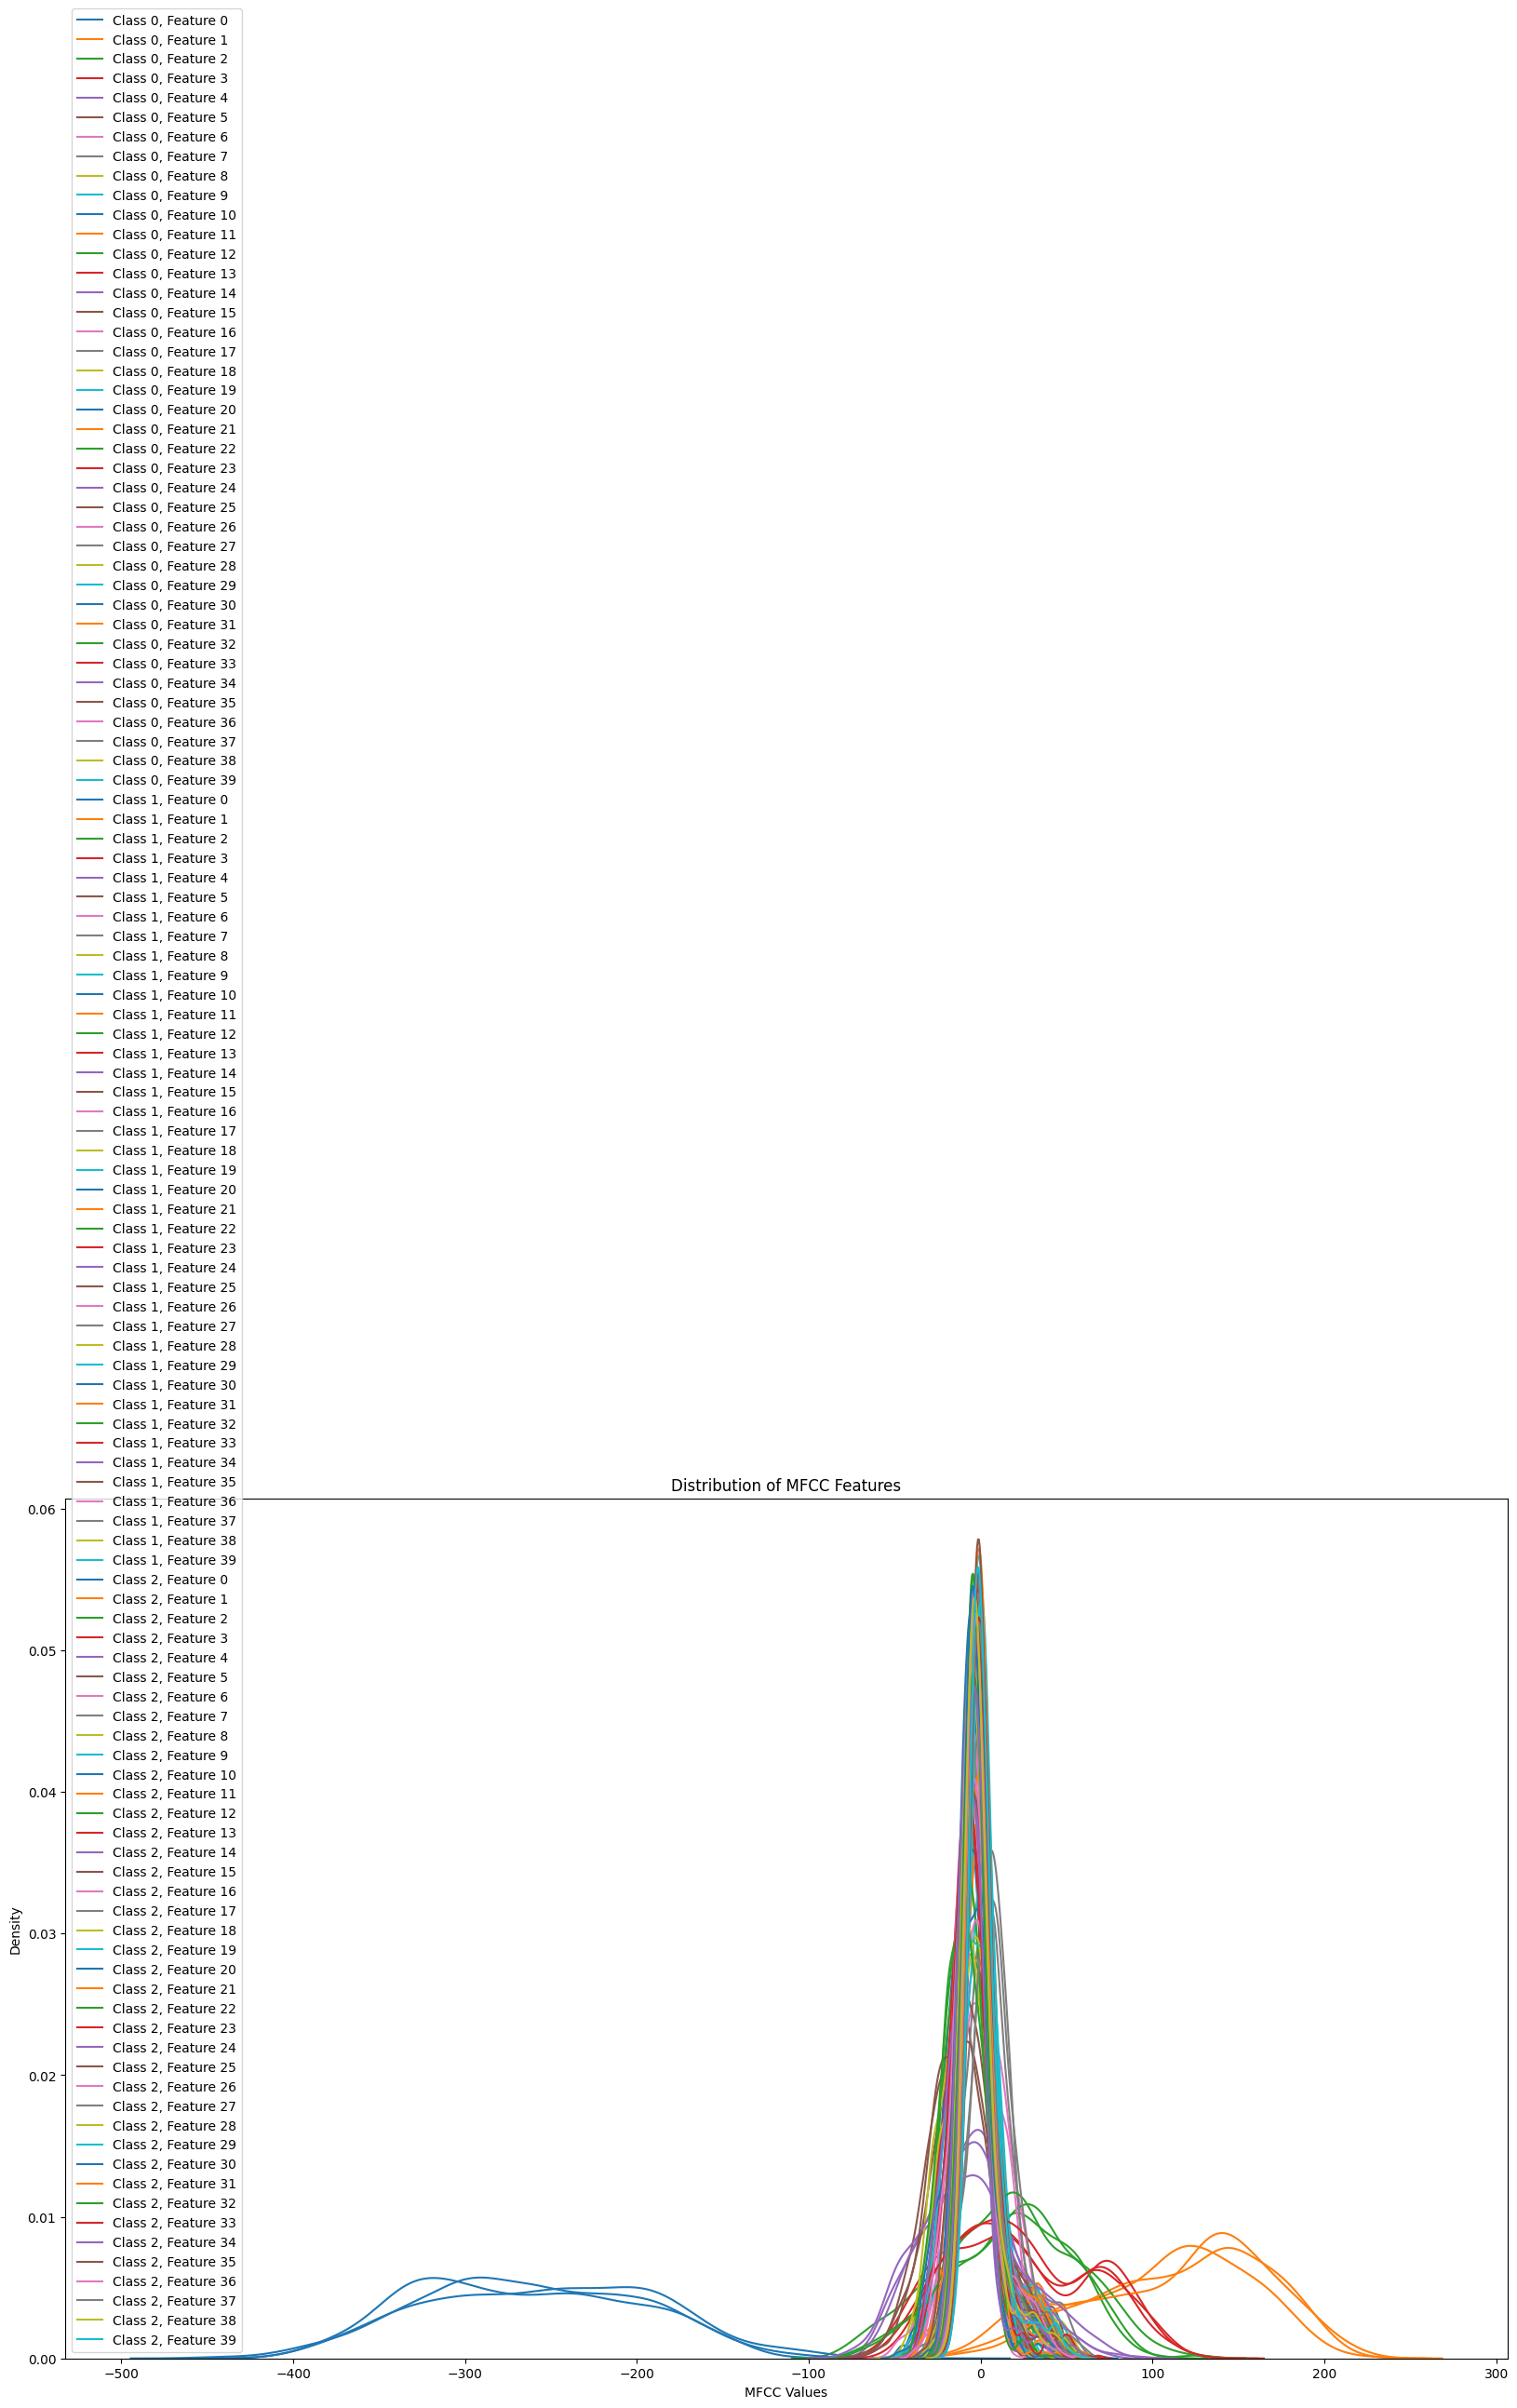

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming label_features_df contains your data
healthy_data = label_features_df[label_features_df['class'] == 0]['feature'].tolist()
dysphonie_data = label_features_df[label_features_df['class'] == 1]['feature'].tolist()
laryngitis_data = label_features_df[label_features_df['class'] == 2]['feature'].tolist()

# Plotting the MFCC features using KDE
plt.figure(figsize=(20, 12))

for idx, data in enumerate([healthy_data, dysphonie_data, laryngitis_data]):
    for i in range(len(data[0])):
        sns.kdeplot(np.array(data)[:, i], label=f'Class {idx}, Feature {i}')

plt.title('Distribution of MFCC Features')
plt.xlabel('MFCC Values')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
path="/content/drive/MyDrive/FYP 2023/Dataset"
label_features_df.to_json(path+'processed_data_multiclass.json')
X=np.array(label_features_df['feature'].tolist())
Y=np.array(label_features_df['class'].tolist())

print(len(X[-1]))
print(X.shape,Y.shape)
# implementing train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

40
(2879, 40) (2879,)
(2303, 40) (576, 40)
(2303,) (576,)


In [ ]:
classifiers = []
for class_label in range(3):
    y_train_binary = (Y_train == class_label).astype(int)
    print(y_train_binary)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, criterion = "entropy")
    rf_classifier.fit(X_train, y_train_binary)
    classifiers.append(rf_classifier)

y_pred_probs = np.zeros((len(X_test), 3))
for class_label, clf in enumerate(classifiers):
    y_pred_probs[:, class_label] = clf.predict_proba(X_test)[:, 1]


y_pred = np.argmax(y_pred_probs, axis=1)

print(y_pred)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


[0 0 1 ... 1 0 1]
[1 0 0 ... 0 0 0]
[0 1 0 ... 0 1 0]
[2 1 0 0 1 0 1 0 1 0 1 0 0 1 1 2 1 1 0 2 2 1 0 1 2 0 0 0 2 2 1 0 0 0 1 1 0
 1 0 0 2 2 1 0 2 2 1 0 1 0 0 2 1 0 1 2 1 0 0 2 2 1 2 2 2 1 2 1 1 1 2 0 1 0
 1 1 0 1 0 1 1 2 1 1 2 0 2 2 2 1 0 0 1 2 1 2 2 0 2 0 1 2 0 1 0 0 1 1 1 0 0
 0 2 0 0 2 0 2 0 0 1 2 1 2 0 1 1 0 2 2 0 1 1 1 2 1 0 0 0 0 1 2 2 2 1 0 1 0
 2 1 0 0 0 2 0 2 1 2 1 1 1 1 2 0 0 1 0 1 1 1 0 0 2 1 0 2 1 2 1 0 2 0 0 1 2
 0 2 1 2 0 2 0 0 0 0 1 2 2 1 1 0 2 1 2 2 0 0 0 2 0 2 1 0 0 0 0 2 0 1 1 0 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 2 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0
 2 1 0 0 2 2 1 1 1 2 1 1 0 2 2 1 0 0 1 0 1 1 1 1 2 2 2 0 1 1 0 0 0 1 1 0 1
 0 1 1 2 0 1 0 1 1 0 0 0 0 0 1 1 1 0 2 1 0 1 1 1 0 1 0 0 2 1 1 1 0 1 0 1 0
 2 0 0 1 1 1 2 1 1 1 0 0 1 1 0 2 0 1 0 1 1 1 1 0 1 0 1 2 2 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 2 1 1 1 1 2 1 1 2 0 1 2 0 1 1 1 1 1 1 1 0 0 1 1 1 0 2 1 0 1
 1 2 2 0 1 0 1 2 0 2 1 0 1 0 1 1 0 1 1 1 1 1 0 1 2 1 0 2 1 2 1 0 1 0 1 1 0
 1 2 0 0 2 2 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1

In [ ]:

############   Start from here ###############


# path = "/content/drive/MyDrive/sbvoiceDataset/"
path = '/content/drive/MyDrive/sbvoiceAUG_Dataset/processed_data_multiclass_with_mfcc_lpcc.json'
# label_features_df_saved=pd.read_json(path+'processed_data_lpcc.json')
label_features_df_saved=pd.read_json(path)
label_features_df_saved.tail()

X=np.array(label_features_df_saved['feature'].tolist())
Y=np.array(label_features_df_saved['class'].tolist())
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=60)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(5758, 64) (5758,)
(4606, 64) (1152, 64)
(4606,) (1152,)


In [ ]:
clf1 = RandomForestClassifier(n_estimators = 120, criterion="gini", oob_score=True, max_features= "sqrt", random_state=33)
clf1.fit(X_train, Y_train)
y_pred = clf1.predict(X_test)
print(clf1.oob_score_)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))
tree_depths = [estimator.tree_.max_depth for estimator in clf1.estimators_]

# # Print depths of each tree
# for i, depth in enumerate(tree_depths, start=1):
#     print(f"Tree {i} depth: {depth}")


0.5538428137212332
ACCURACY OF THE MODEL:  0.5946180555555556


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1_score = metrics.f1_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.6009500673998697
Recall: 0.5847324942564839
F1 Score: 0.5877936260467161
Accuracy: 0.5946180555555556


In [ ]:
clf2 = RandomForestClassifier(n_estimators = 20, criterion="entropy", random_state=33)
clf2.fit(X_train, Y_train)
y_pred = clf2.predict(X_test)
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))
tree_depths = [estimator.tree_.max_depth for estimator in clf2.estimators_]

# # Print depths of each tree
# for i, depth in enumerate(tree_depths, start=1):
#     print(f"Tree {i} depth: {depth}")


ACCURACY OF THE MODEL:  0.8845486111111112


In [ ]:
clf3 = RandomForestClassifier(n_estimators = 20, criterion="log_loss", random_state=33)
clf3.fit(X_train, Y_train)
y_pred = clf3.predict(X_test)
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))
tree_depths = [estimator.tree_.max_depth for estimator in clf3.estimators_]

# # Print depths of each tree
# for i, depth in enumerate(tree_depths, start=1):
#     print(f"Tree {i} depth: {depth}")


ACCURACY OF THE MODEL:  0.8845486111111112


In [ ]:
classifiers = []
for class_label in range(3):
    y_train_binary = (Y_train == class_label).astype(int)
    print(y_train_binary)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, criterion = "entropy")
    rf_classifier.fit(X_train, y_train_binary)
    classifiers.append(rf_classifier)

y_pred_probs = np.zeros((len(X_test), 3))
for class_label, clf in enumerate(classifiers):
    y_pred_probs[:, class_label] = clf.predict_proba(X_test)[:, 1]


y_pred = np.argmax(y_pred_probs, axis=1)

print(y_pred)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


[0 0 1 ... 1 0 1]
[1 0 0 ... 0 0 0]
[0 1 0 ... 0 1 0]
[2 1 0 0 1 0 1 0 1 0 1 0 0 1 1 2 1 1 0 2 2 1 0 1 2 0 0 0 2 2 1 0 0 0 1 1 0
 1 0 0 2 2 1 0 2 2 1 0 1 0 0 2 1 0 1 2 1 0 0 2 2 1 2 2 2 1 2 1 1 1 2 0 1 0
 1 1 0 1 0 1 1 2 1 1 2 0 2 2 2 1 0 0 1 2 1 2 2 0 2 0 1 2 0 1 0 0 1 1 1 0 0
 0 2 0 0 2 0 2 0 0 1 2 1 2 0 1 1 0 2 2 0 1 1 1 2 1 0 0 0 0 1 2 2 2 1 0 1 0
 2 1 0 0 0 2 0 2 1 2 1 1 1 1 2 0 0 1 0 1 1 1 0 0 2 1 0 2 1 2 1 0 2 0 0 1 2
 0 2 1 2 0 2 0 0 0 0 1 2 2 1 1 0 2 1 2 2 0 0 0 2 0 2 1 0 0 0 0 2 0 1 1 0 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 2 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0
 2 1 0 0 2 2 1 1 1 2 1 1 0 2 2 1 0 0 1 0 1 1 1 1 2 2 2 0 1 1 0 0 0 1 1 0 1
 0 1 1 2 0 1 0 1 1 0 0 0 0 0 1 1 1 0 2 1 0 1 1 1 0 1 0 0 2 1 1 1 0 1 0 1 0
 2 0 0 1 1 1 2 1 1 1 0 0 1 1 0 2 0 1 0 1 1 1 1 0 1 0 1 2 2 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 2 1 1 1 1 2 1 1 2 0 1 2 0 1 1 1 1 1 1 1 0 0 1 1 1 0 2 1 0 1
 1 2 2 0 1 0 1 2 0 2 1 0 1 0 1 1 0 1 1 1 1 1 0 1 2 1 0 2 1 2 1 0 1 0 1 1 0
 1 2 0 0 2 2 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1

In [ ]:
folder_path = "/content/drive/MyDrive/FYP 2023/Dataset"
all_files = []
for root, dirs, files in os.walk(folder_path):
  for file in files:
    all_files.append(os.path.join(root, file))

if all_files:
    random_file = random.choice(all_files)
    print("Random file selected:", random_file)
else:
    print("No files found in the folder.")

if "healthy" in random_file:
  expected = 0
elif "laryngitis" in random_file:
  expected = 2
elif "Dysphonie" in random_file:
  expected = 1
audio, samplerate=librosa.load(random_file)
mfccs = librosa.feature.mfcc(y=audio, sr=samplerate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs.T,axis=0)
print(expected)
test_file = mfccs_scaled_features.reshape(1,40)
print(test_file.shape)

a =clf1.predict(test_file)
b= clf2.predict(test_file)
c = clf3.predict(test_file)
print(a,b,c)

Random file selected: /content/drive/MyDrive/FYP 2023/Dataset/male_laryngitis/1237-a_lhl.wav
2
(1, 40)
[2] [2] [2]


In [ ]:
scores1 = cross_val_score(clf1, X, Y, cv = 5)
print(scores1)
scores2 = cross_val_score(clf2, X, Y, cv = 5)
print(scores2)
scores3 = cross_val_score(clf3, X, Y, cv = 5)
print(scores3)

[0.47395833 0.46527778 0.43923611 0.38888889 0.33565217]
[0.49131944 0.45833333 0.43923611 0.36979167 0.33565217]
[0.49131944 0.45833333 0.43923611 0.36979167 0.33565217]


In [ ]:
print(f"Mean Validation Score: {scores1.mean():.4f}")
print(f"Mean Validation Score: {scores2.mean():.4f}")
print(f"Mean Validation Score: {scores3.mean():.4f}")

Mean Validation Score: 0.4206
Mean Validation Score: 0.4189
Mean Validation Score: 0.4189


In [ ]:
param_grid = {
    'n_estimators': [350, 400, 450, 500],
    'max_depth': [20, 25, 30]
}

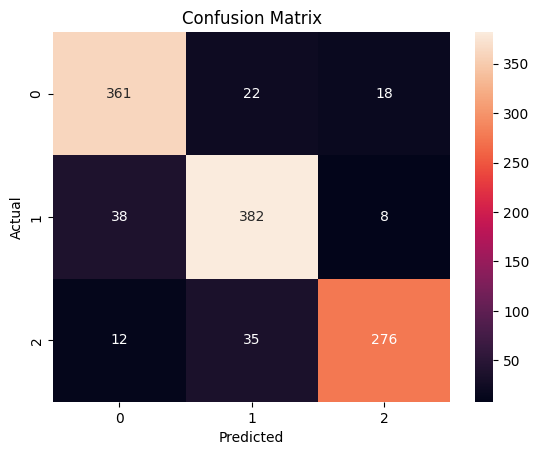



Precision: 0.8874707456182094
Recall: 0.8824206350437573
Accuracy: 0.8845486111111112


In [ ]:
clf1 = RandomForestClassifier(n_estimators = 20, criterion="gini", oob_score=True, max_features= "sqrt", random_state=33)
clf1.fit(X_train, Y_train)
y_pred = clf1.predict(X_test)
print()
# print(clf1.oob_score_)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))
tree_depths = [estimator.tree_.max_depth for estimator in clf1.estimators_]

# # Print depths of each tree
# for i, depth in enumerate(tree_depths, start=1):
#     print(f"Tree {i} depth: {depth}")


from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import precision_score, recall_score, accuracy_score
# Calculate precision, recall, and accuracy
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

# Print the results

print("\n")
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

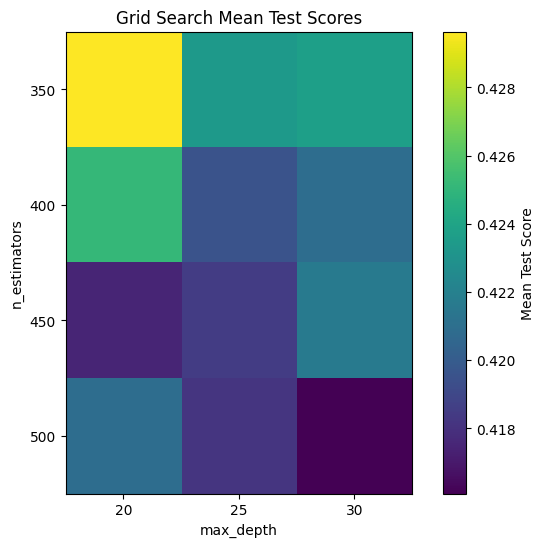

In [ ]:
grid_search = GridSearchCV(clf1, param_grid, cv=5)
grid_search.fit(X, Y)

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))

# Visualize the effect of hyperparameters on model performance (heatmap)
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.colorbar(label='Mean Test Score')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.title('Grid Search Mean Test Scores')
plt.show()

In [2]:
!pip freeze > requirements.txt